<a href="https://colab.research.google.com/github/amita-kapoor/COVID-2020/blob/master/Covid19_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Source: https://github.com/imdevskp/covid-19-india-data


In [0]:
# libraries

from datetime import datetime
import os
import glob
import requests 
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

In [0]:
# download data 
# =============

link = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSz8Qs1gE_IYpzlkFkCXGcL_BqR8hZieWVi-rphN1gfrO3H4lDtVZs4kd0C3P8Y9lhsT1rhoB-Q_cP4/pubhtml#'
req = requests.get(link)
soup = BeautifulSoup(req.content, "html.parser")

In [0]:
tbody = soup.find_all('tbody')[0]
body = tbody.find_all('tr')

In [111]:
head_row = [i.text for i in body[0].find_all('td')]
head_row

['Patient Number',
 'State Patient Number',
 'Date Announced',
 'Age Bracket',
 'Gender',
 'Detected City',
 'Detected District',
 'Detected State',
 'State code',
 'Current Status',
 'Notes',
 'Contracted from which Patient (Suspected)',
 'Nationality',
 'Type of transmission',
 'Status Change Date',
 'Source_1',
 'Source_2',
 'Source_3',
 'Backup Notes',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [0]:
contents = []

for i in range(len(body)):
    contents.append([i.text for i in body[i].find_all('td')])

In [113]:
p_df = pd.DataFrame(contents[2:len(contents)], columns=head_row)
p_df.head()

Patient Number State Patient Number Date Announced Age Bracket  ...            
0              1             KL-TS-P1     30/01/2020          20  ...        None
1              2             KL-AL-P1     02/02/2020              ...            
2              3             KL-KS-P1     03/02/2020              ...            
3              4                DL-P1     02/03/2020          45  ...            
4              5                TS-P1     02/03/2020          24  ...            

[5 rows x 26 columns]

In [0]:
# selecting important columns only
# ================================

p_df = p_df.loc[:, :'Backup Notes']

In [115]:
# looking for missing values 
# ==========================

p_df.isna().sum()

Patient Number                               0
State Patient Number                         0
Date Announced                               0
Age Bracket                                  0
Gender                                       0
Detected City                                0
Detected District                            0
Detected State                               0
State code                                   0
Current Status                               0
Notes                                        0
Contracted from which Patient (Suspected)    0
Nationality                                  0
Type of transmission                         0
Status Change Date                           0
Source_1                                     0
Source_2                                     0
Source_3                                     0
Backup Notes                                 0
dtype: int64

In [116]:
# no. of empty strings in each column
# ===================================

print(p_df.shape)

for i in p_df.columns:
    print(i, '\t', p_df[p_df[i]==''].shape[0])

(17064, 19)
Patient Number 	 946
State Patient Number 	 14718
Date Announced 	 995
Age Bracket 	 15410
Gender 	 13472
Detected City 	 15234
Detected District 	 3498
Detected State 	 997
State code 	 997
Current Status 	 995
Notes 	 2313
Contracted from which Patient (Suspected) 	 15535
Nationality 	 15753
Type of transmission 	 14113
Status Change Date 	 1106
Source_1 	 1394
Source_2 	 13720
Source_3 	 16618
Backup Notes 	 16704


In [117]:
# replacing empty strings with np.nan
# ==================================-

print(p_df.shape)

p_df = p_df.replace(r'', np.nan, regex=True)
p_df.isna().sum()


(17064, 19)


Patient Number                                 946
State Patient Number                         14718
Date Announced                                 995
Age Bracket                                  15410
Gender                                       13472
Detected City                                15234
Detected District                             3498
Detected State                                 997
State code                                     997
Current Status                                 995
Notes                                         2313
Contracted from which Patient (Suspected)    15535
Nationality                                  15753
Type of transmission                         14113
Status Change Date                            1106
Source_1                                      1394
Source_2                                     13720
Source_3                                     16618
Backup Notes                                 16704
dtype: int64

In [118]:
# droping empty rows (row with just row number but without patient entry
# ======================================================================

p_df.dropna(subset=['Detected State'], inplace=True)
print(p_df.shape)
p_df.isna().sum()

(16067, 19)


Patient Number                                   0
State Patient Number                         13721
Date Announced                                   0
Age Bracket                                  14414
Gender                                       12476
Detected City                                14237
Detected District                             2502
Detected State                                   0
State code                                       0
Current Status                                   0
Notes                                         1317
Contracted from which Patient (Suspected)    14538
Nationality                                  14757
Type of transmission                         13117
Status Change Date                             110
Source_1                                       399
Source_2                                     12724
Source_3                                     15622
Backup Notes                                 15707
dtype: int64

In [119]:


p_df.columns



Index(['Patient Number', 'State Patient Number', 'Date Announced',
       'Age Bracket', 'Gender', 'Detected City', 'Detected District',
       'Detected State', 'State code', 'Current Status', 'Notes',
       'Contracted from which Patient (Suspected)', 'Nationality',
       'Type of transmission', 'Status Change Date', 'Source_1', 'Source_2',
       'Source_3', 'Backup Notes'],
      dtype='object')

In [120]:
# rename dateframe columns 
# ========================

p_df.columns = ['_'.join(col.lower().split()) for col in p_df.columns]
p_df.rename(columns = {'contracted_from_which_patient_(suspected)':'suspected_contacted_patient'}, inplace=True)
p_df.sample(5)


patient_number state_patient_number  ... source_3 backup_notes
5063            5064                  NaN  ...      NaN          NaN
8454            8455              KA-P216  ...      NaN          NaN
1490            1491                  NaN  ...      NaN          NaN
11282          11283                  NaN  ...      NaN          NaN
10757          10758                  NaN  ...      NaN          NaN

[5 rows x 19 columns]

In [121]:
# creating patient id column from patient number
# ===============================================

p_df['p_id'] = p_df['patient_number'].apply(lambda x : 'P'+str(x))
p_df.columns

Index(['patient_number', 'state_patient_number', 'date_announced',
       'age_bracket', 'gender', 'detected_city', 'detected_district',
       'detected_state', 'state_code', 'current_status', 'notes',
       'suspected_contacted_patient', 'nationality', 'type_of_transmission',
       'status_change_date', 'source_1', 'source_2', 'source_3',
       'backup_notes', 'p_id'],
      dtype='object')

In [0]:
p_df = p_df.loc[:, :'backup_notes']

In [123]:


p_df.sample(5)



patient_number state_patient_number  ... source_3 backup_notes
9757            9758                  NaN  ...      NaN          NaN
15678          15679                  NaN  ...      NaN          NaN
14587          14588                  NaN  ...      NaN          NaN
10209          10210                  NaN  ...      NaN          NaN
3529            3530                  NaN  ...      NaN          NaN

[5 rows x 19 columns]

In [0]:
p_df.to_csv('patients_data.csv', index=False)

In [0]:
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  
%matplotlib inline
def plot_details(dataframe, column=None, column_value=None ):
  if column== None:
    p_small = dataframe.copy()
  else:
    p_small = dataframe[dataframe[column]==column_value]
  p_small['age_bracket'].fillna(0, inplace=True)
  p_small['current_status'].fillna('Unknown', inplace=True)
  p_small['gender'].fillna('Unknown', inplace=True)
  try:
    p_small['age_bracket'] = p_small['age_bracket'].astype(str).astype(float)
  except:
    pass
  try:
    fig,(ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,figsize=(16,16))
    ax1.set_ylabel('Numbers',fontsize=20)
    ax1.set_xlabel('Gender',fontsize=20)
    p_small['gender'].hist(ax = ax1,label="Gender Distribution for " + column_value)
    ax2.set_ylabel('Numbers',fontsize=20)
    ax2.set_xlabel('Current status',fontsize=20)
    p_small['current_status'].hist(ax = ax2,label="Present status in " + column_value)
    ax3.set_ylabel('Frequency',fontsize=20)
    ax3.set_xlabel('Age',fontsize=20)
    p_small['age_bracket'].plot.kde(ax = ax3, label="Age distribution of infected in "+ column_value)
    #ax1.plot(df_combines['Germany'],'--o',ms=10,label='Germany')
    #ax1.plot(df_combines["Germany"].rolling(10).mean(),'--o',ms=10,label='Moving average 10 days' )
    ax1.legend(fontsize=15)
    ax2.legend(fontsize=15)
    ax3.legend(fontsize=15)
  except:
    pass
  return p_small


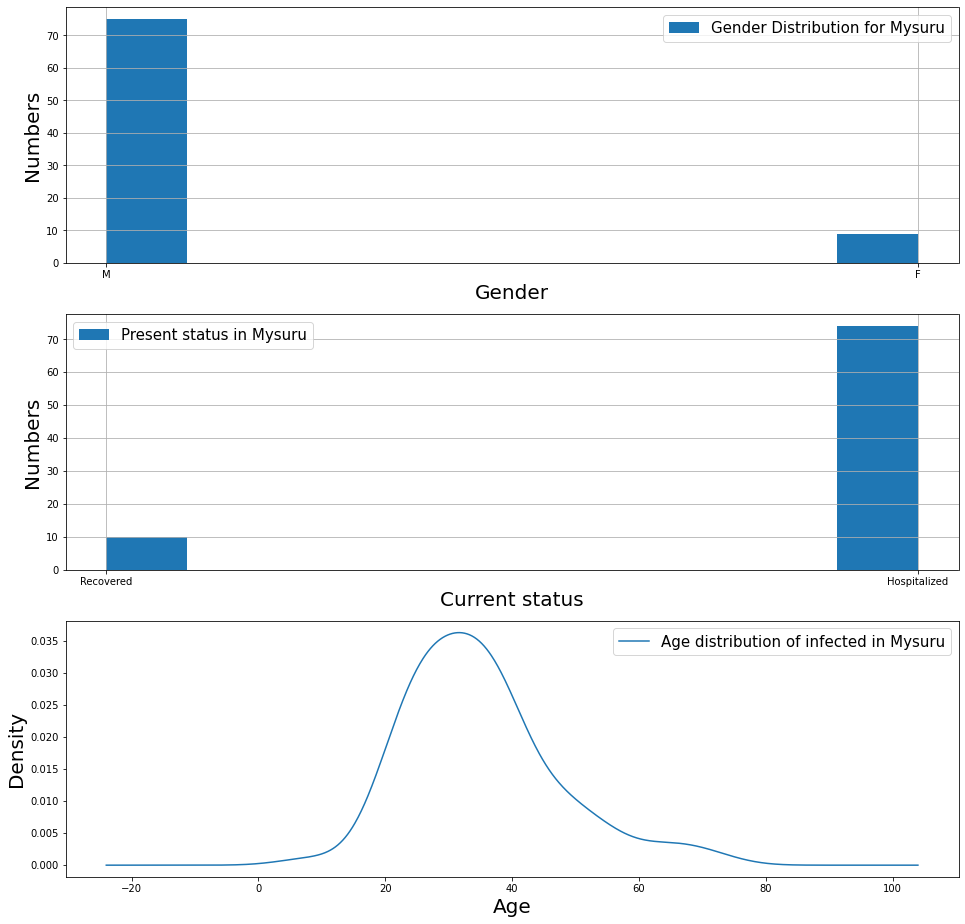

In [126]:
p_mysuru = plot_details(p_df,'detected_district','Mysuru')

In [0]:
States = set(p_df['detected_state'].tolist())  # to be used if you want to do it for all countries

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

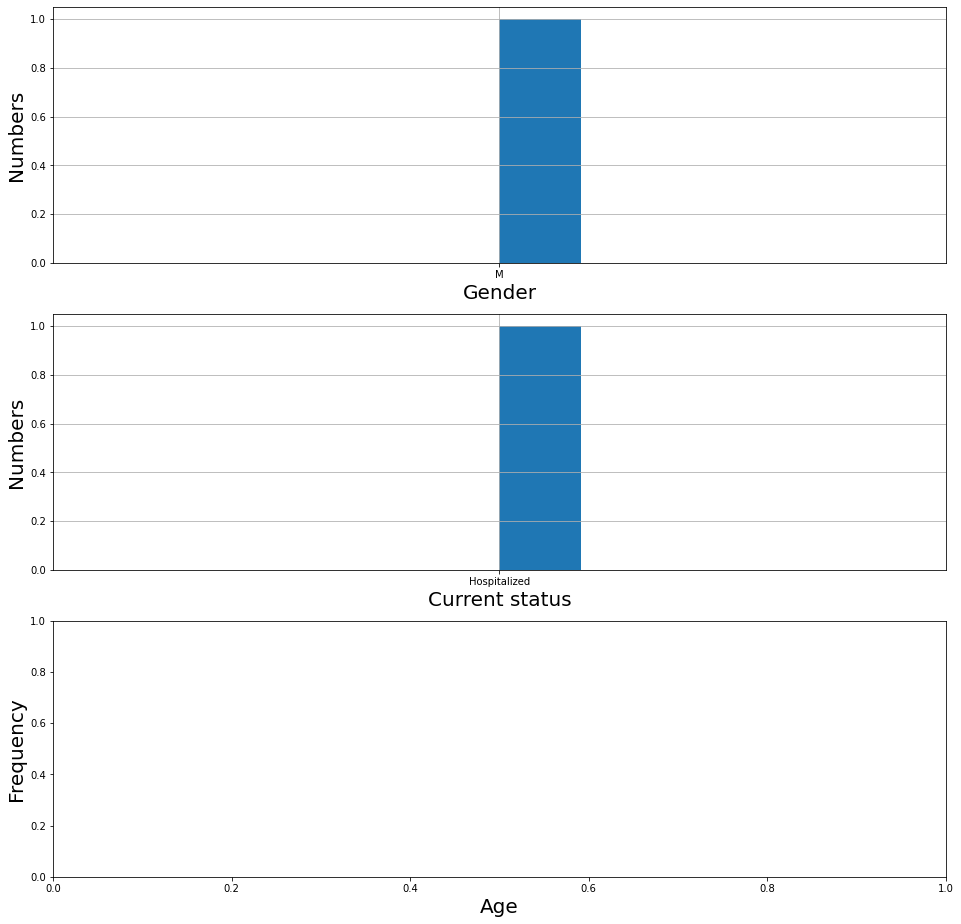

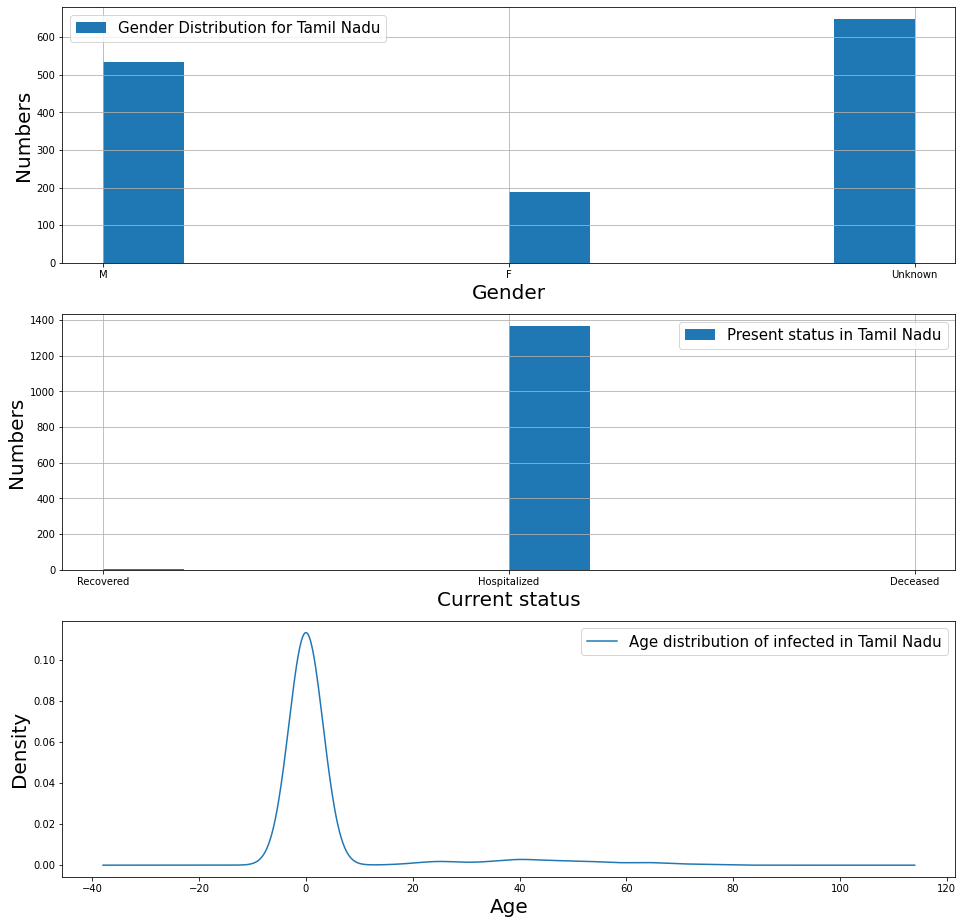

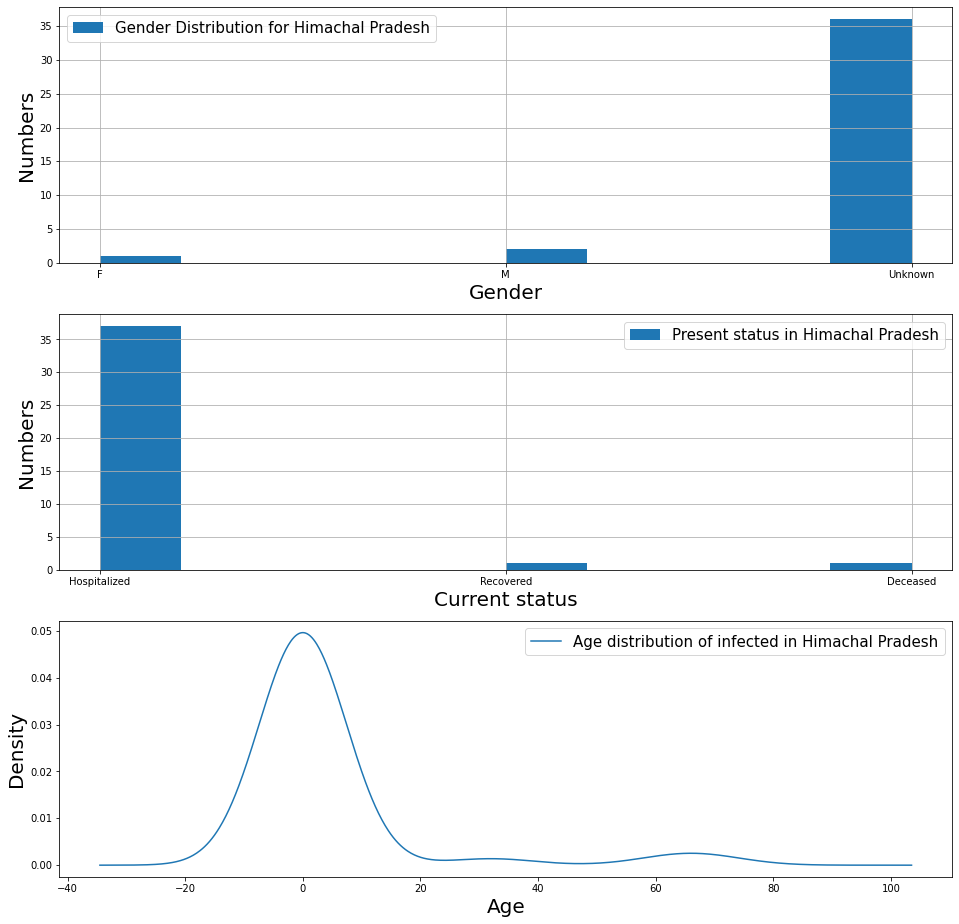

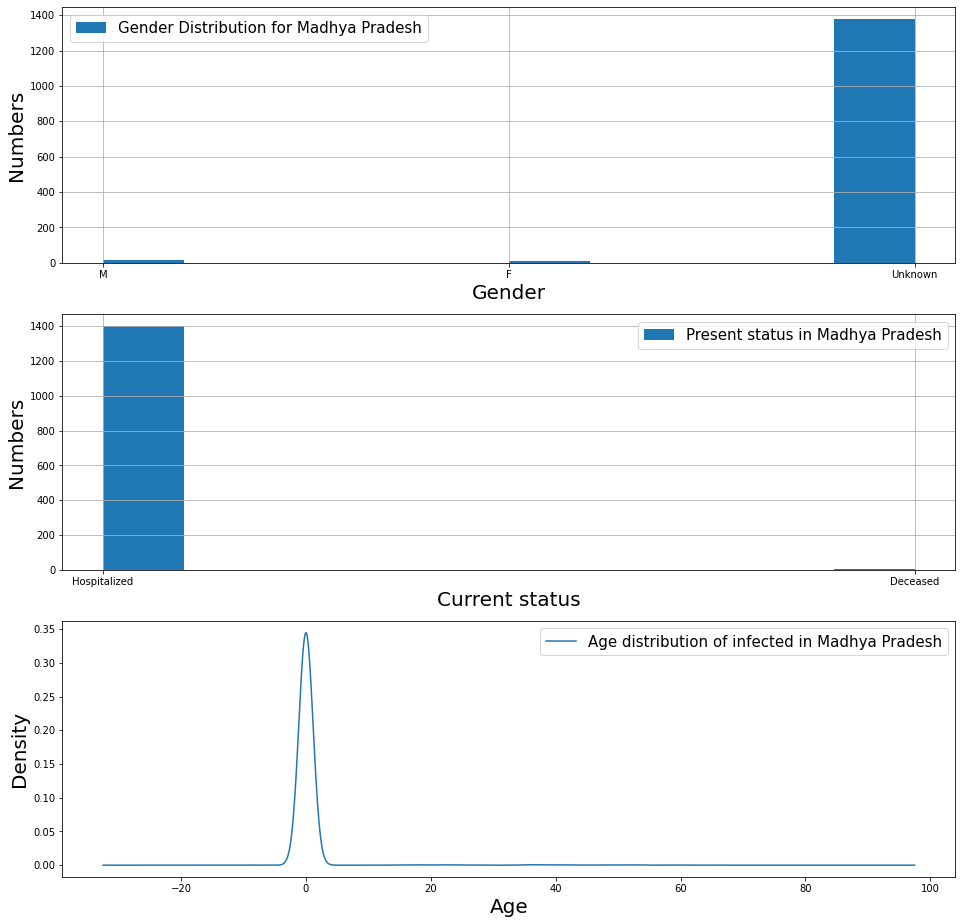

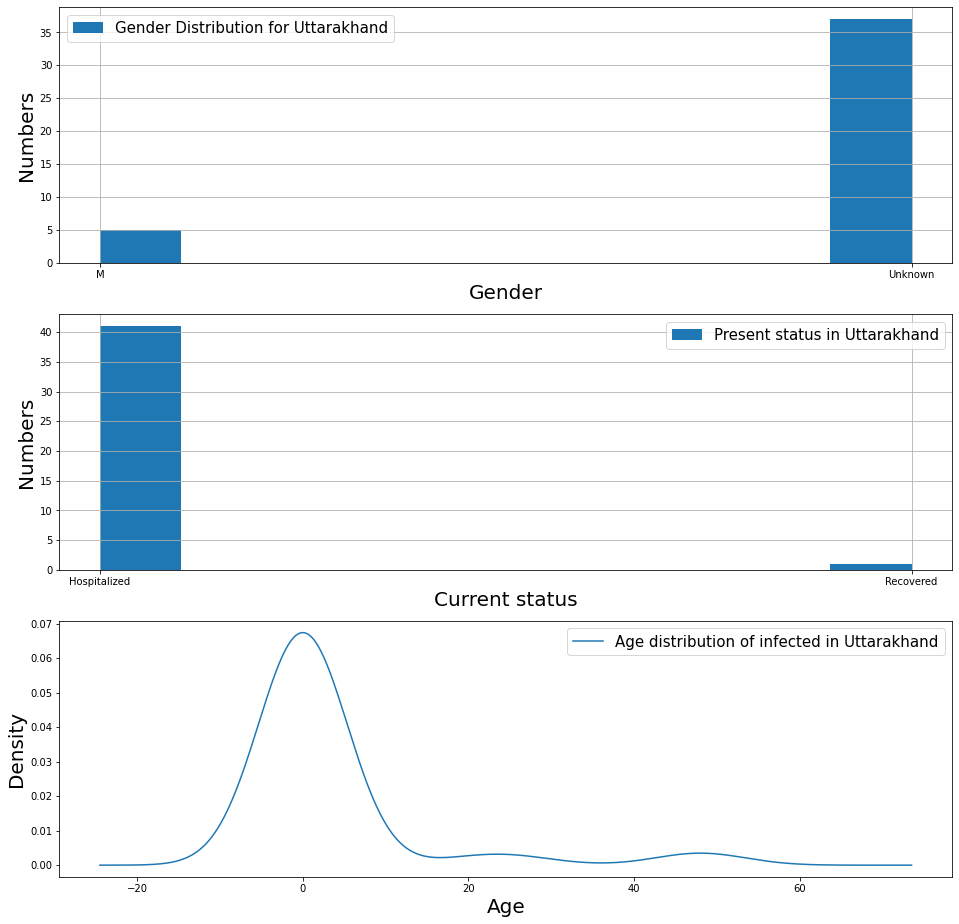

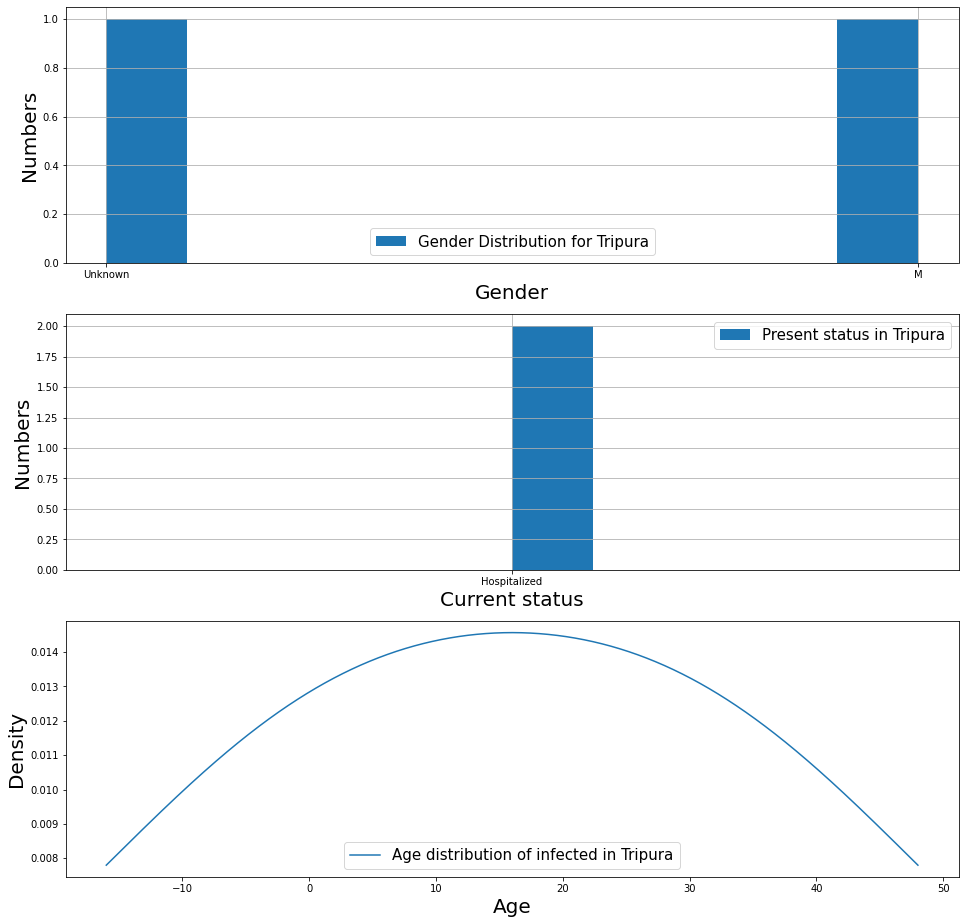

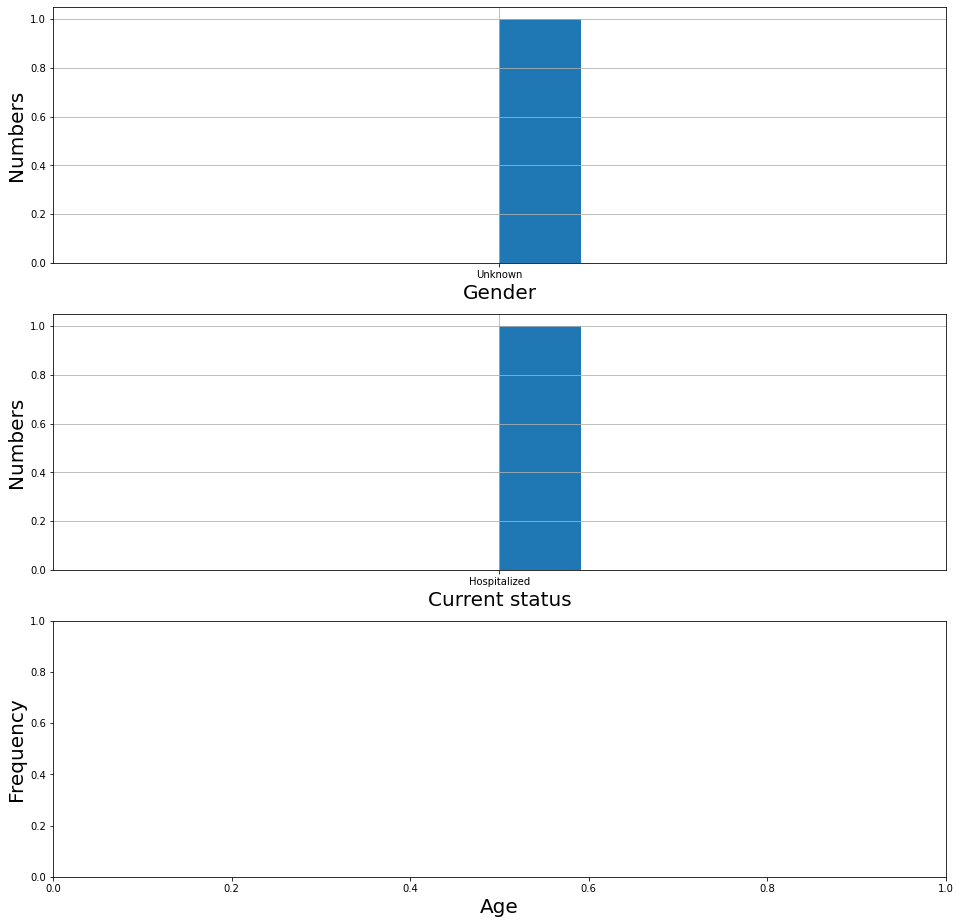

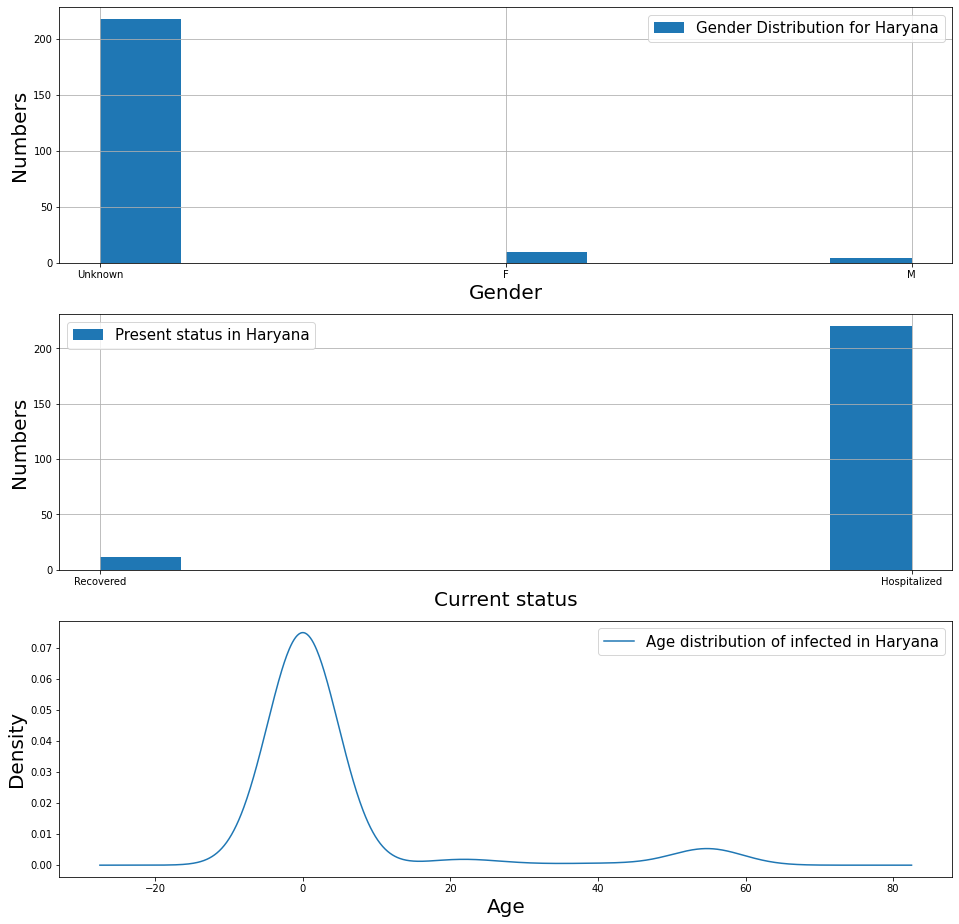

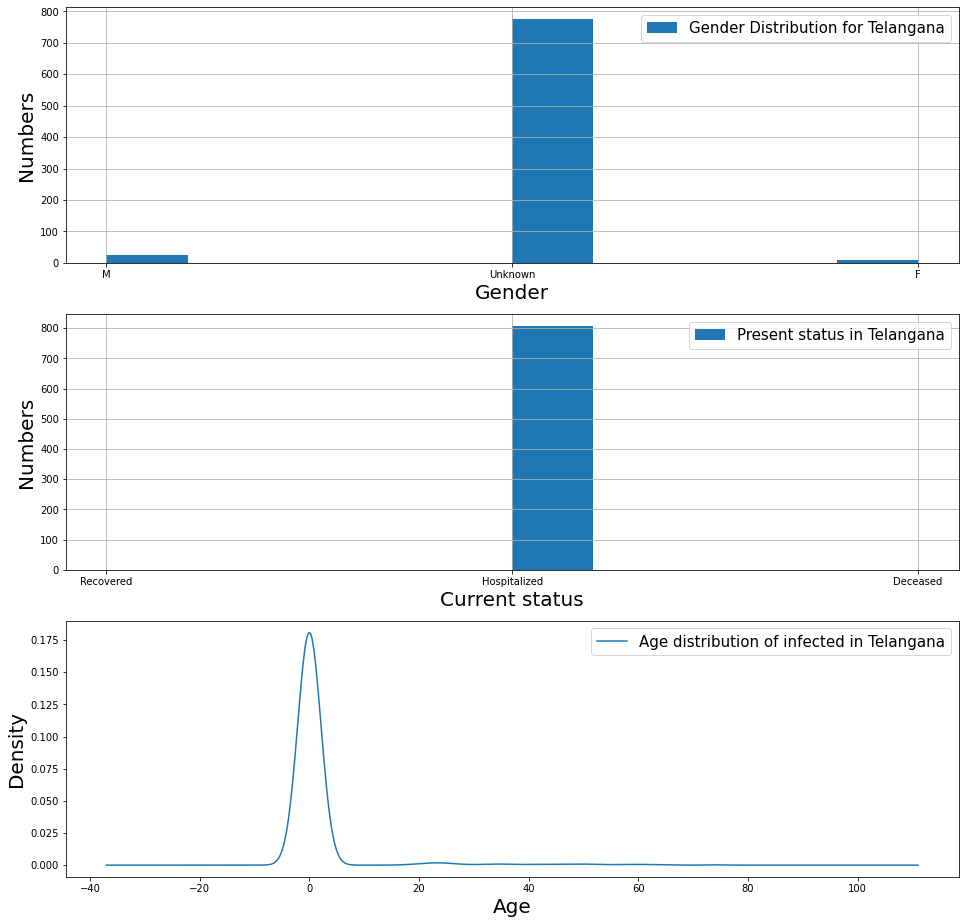

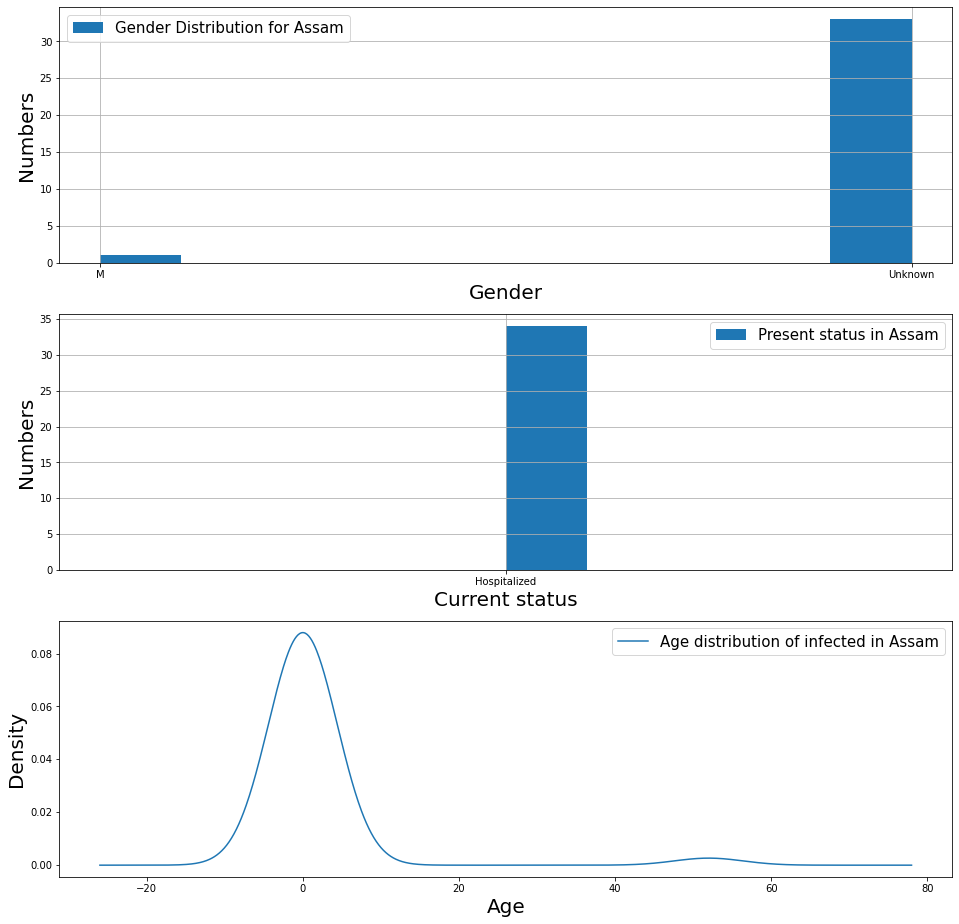

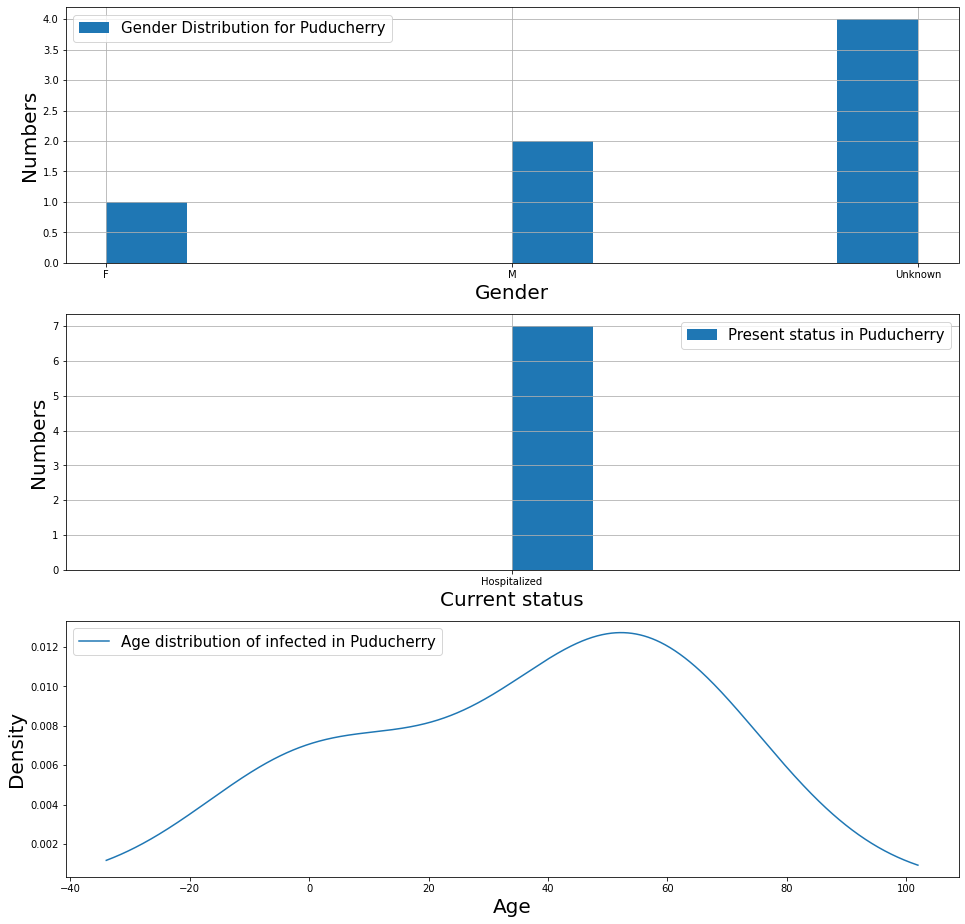

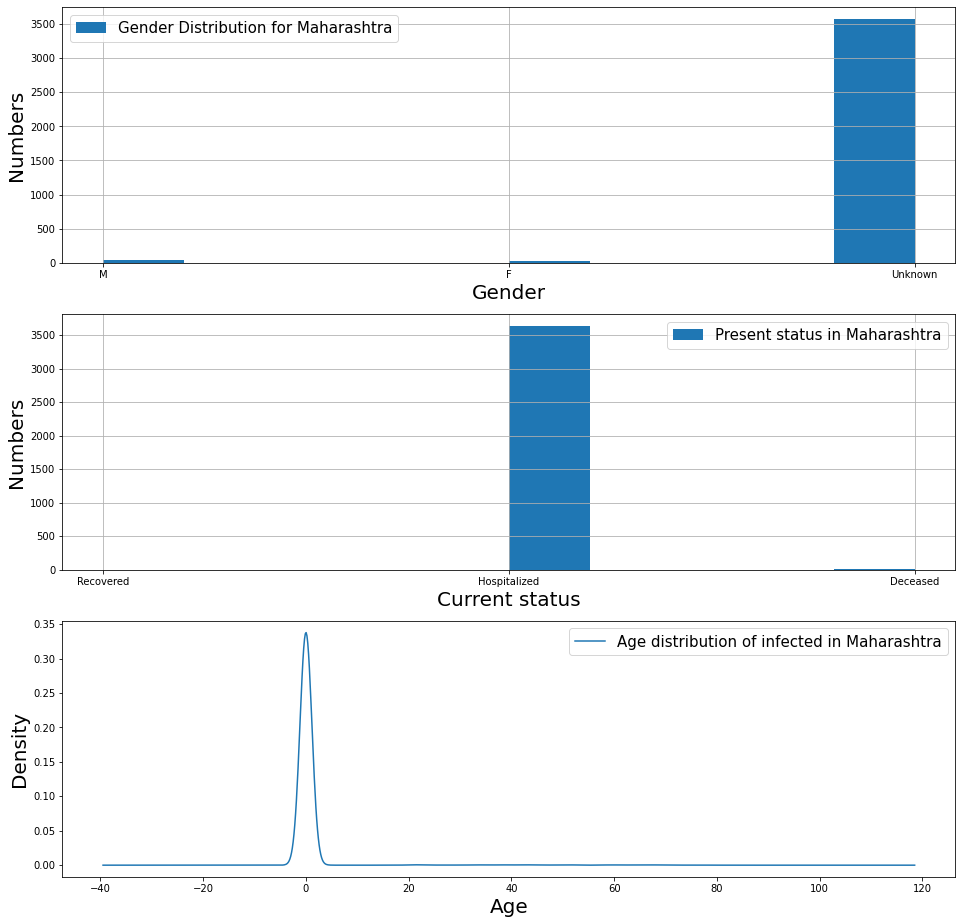

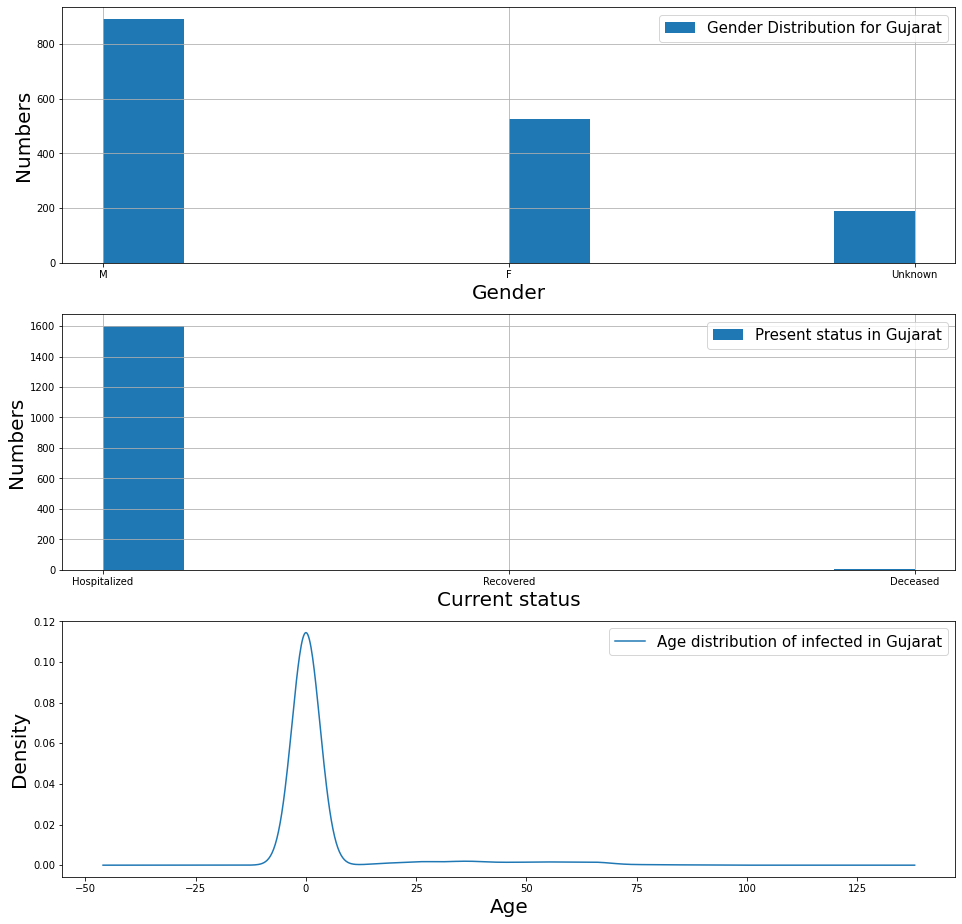

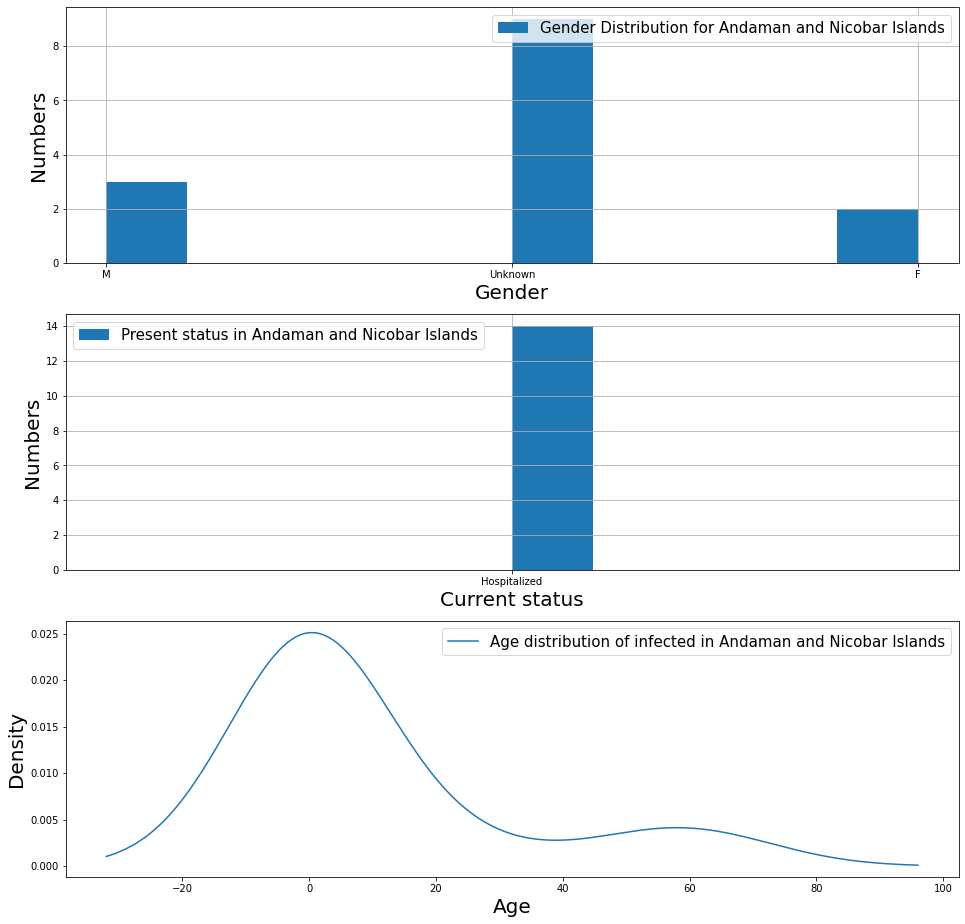

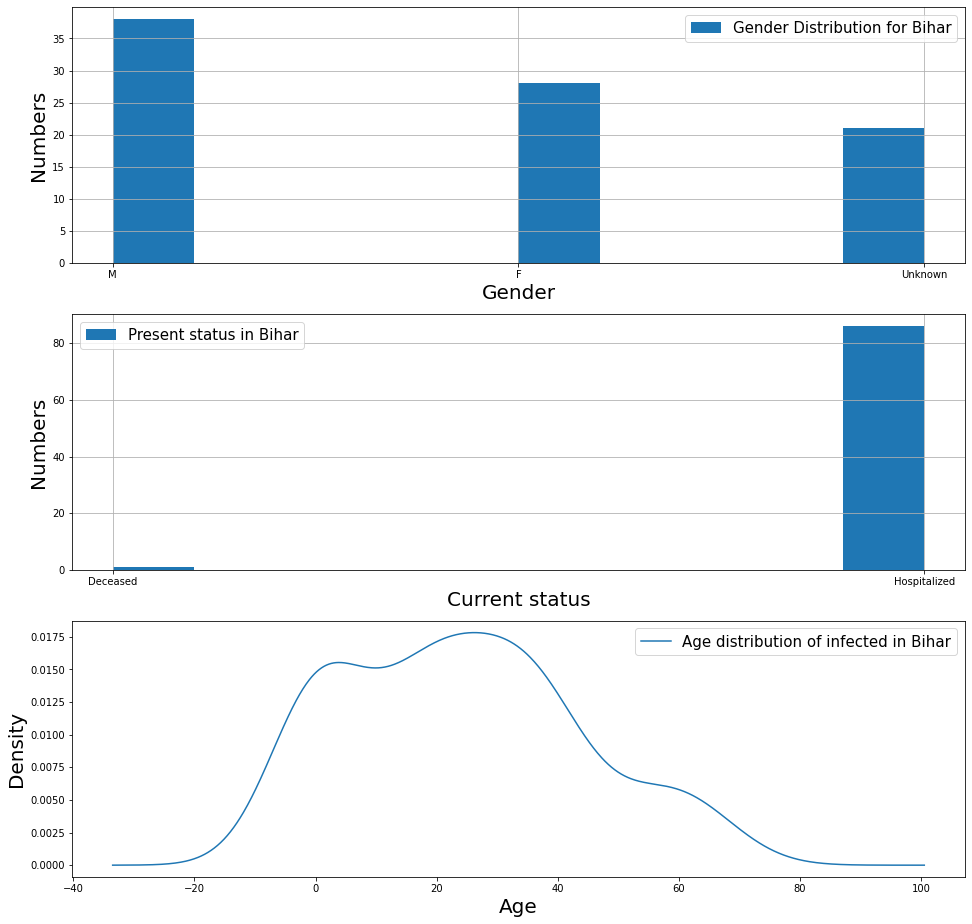

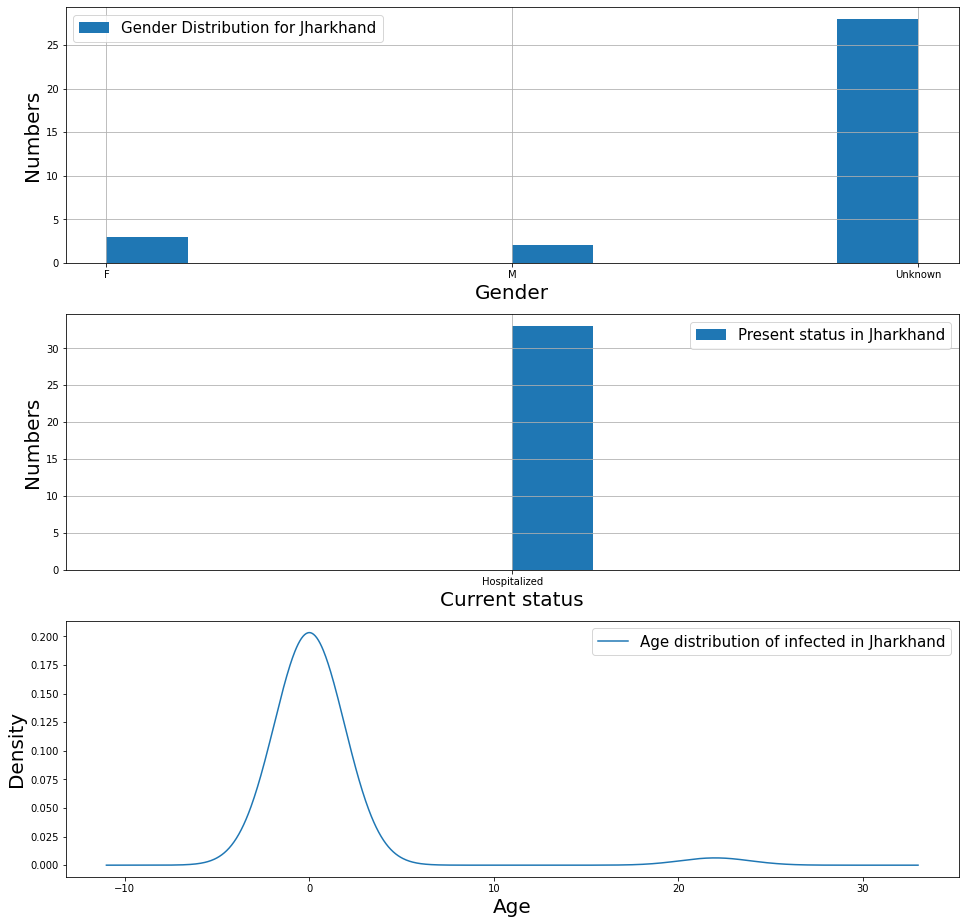

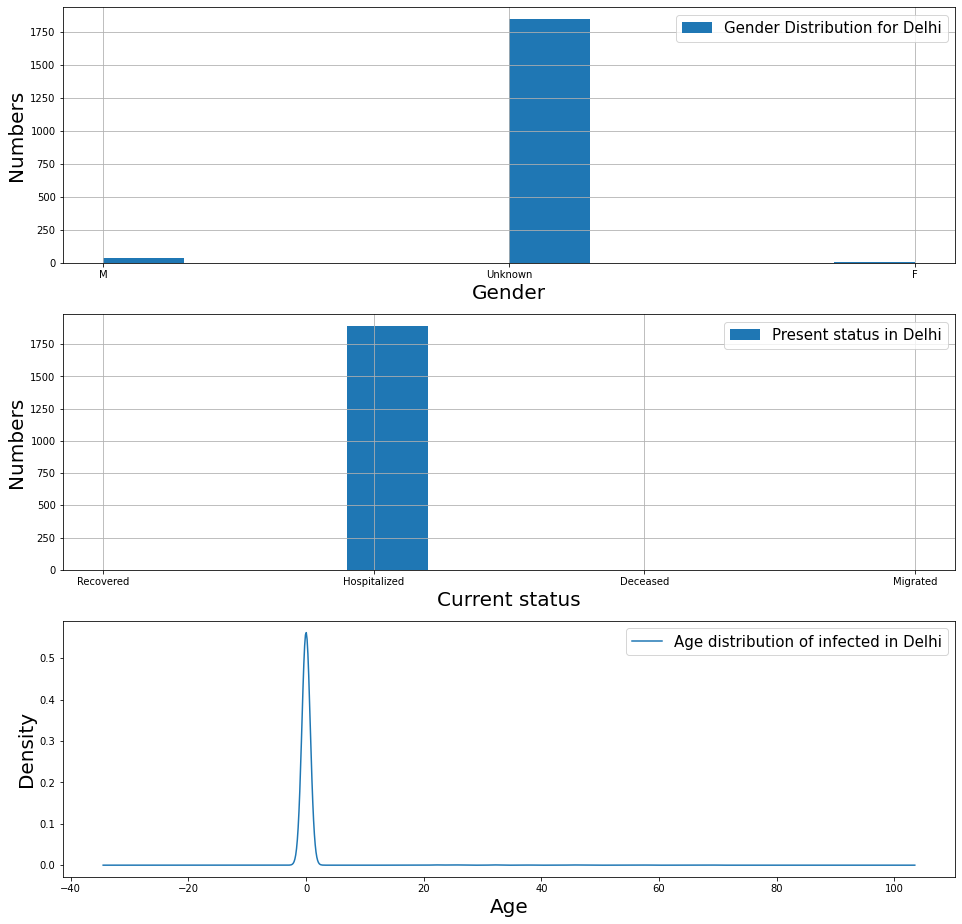

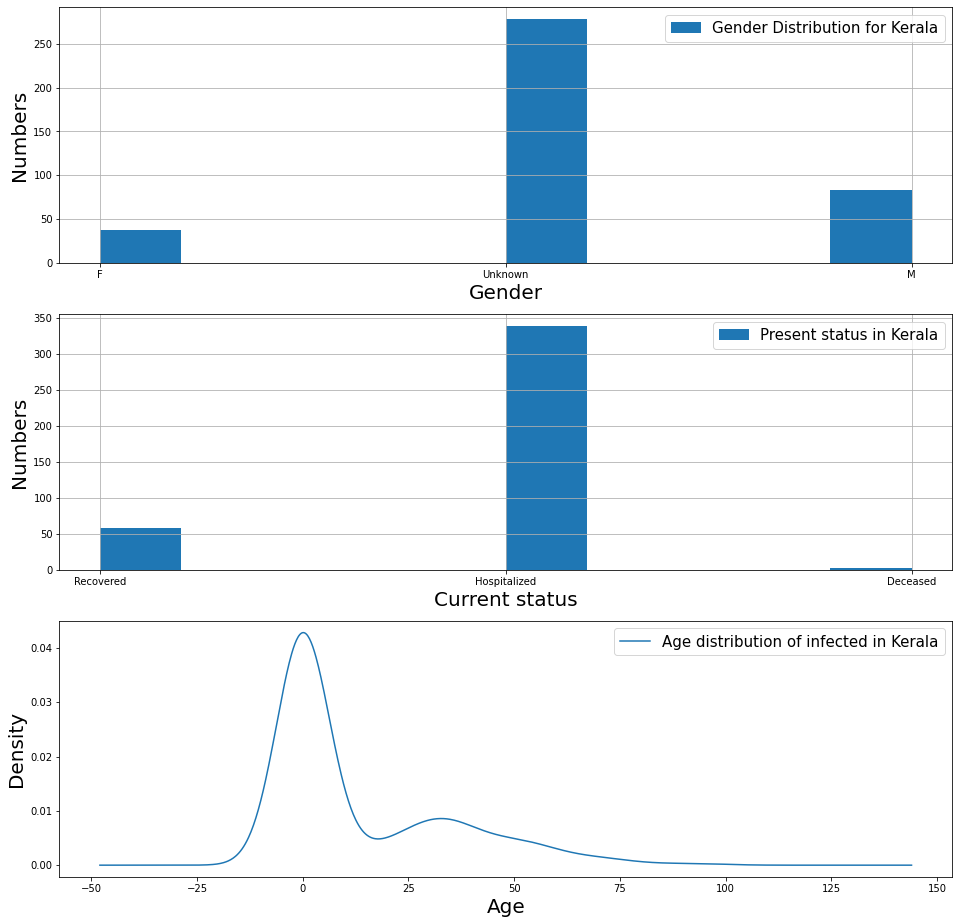

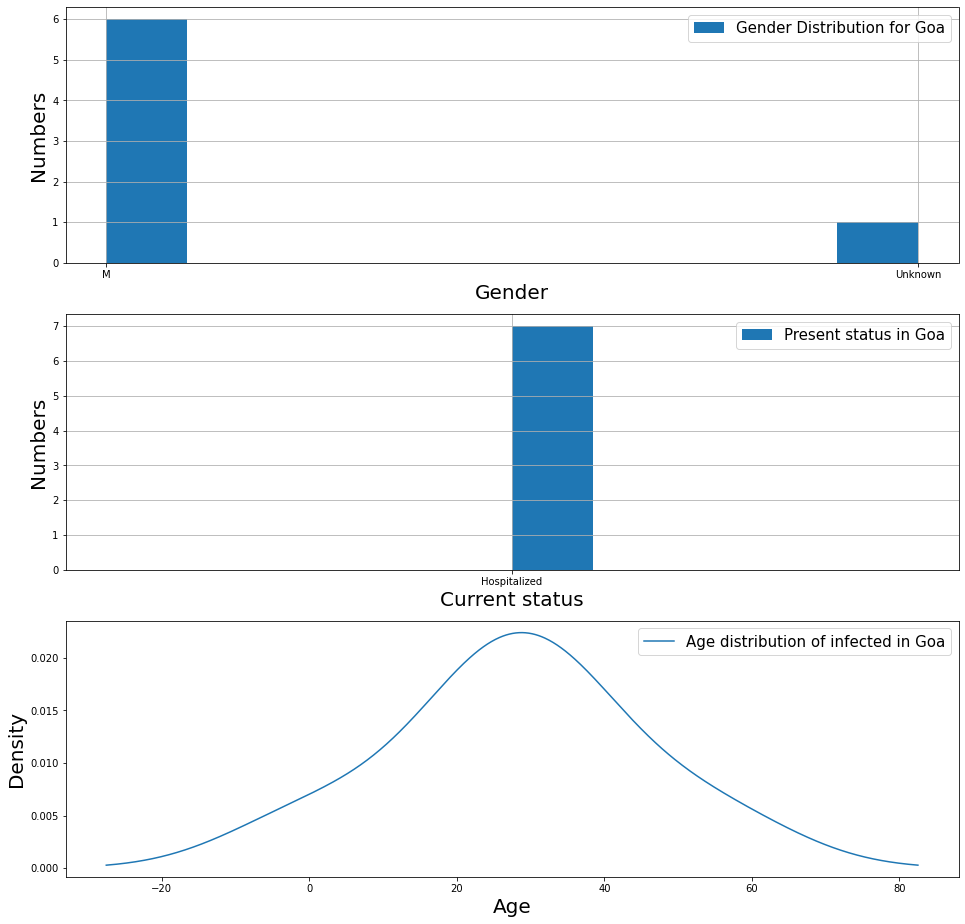

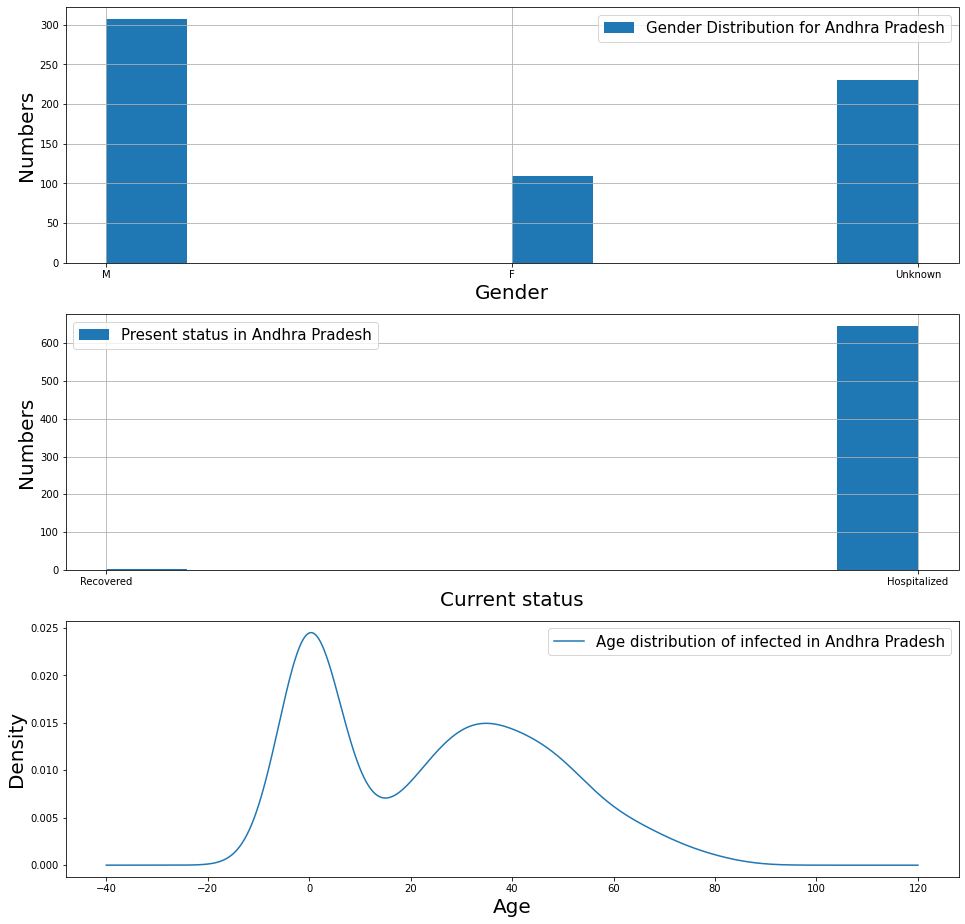

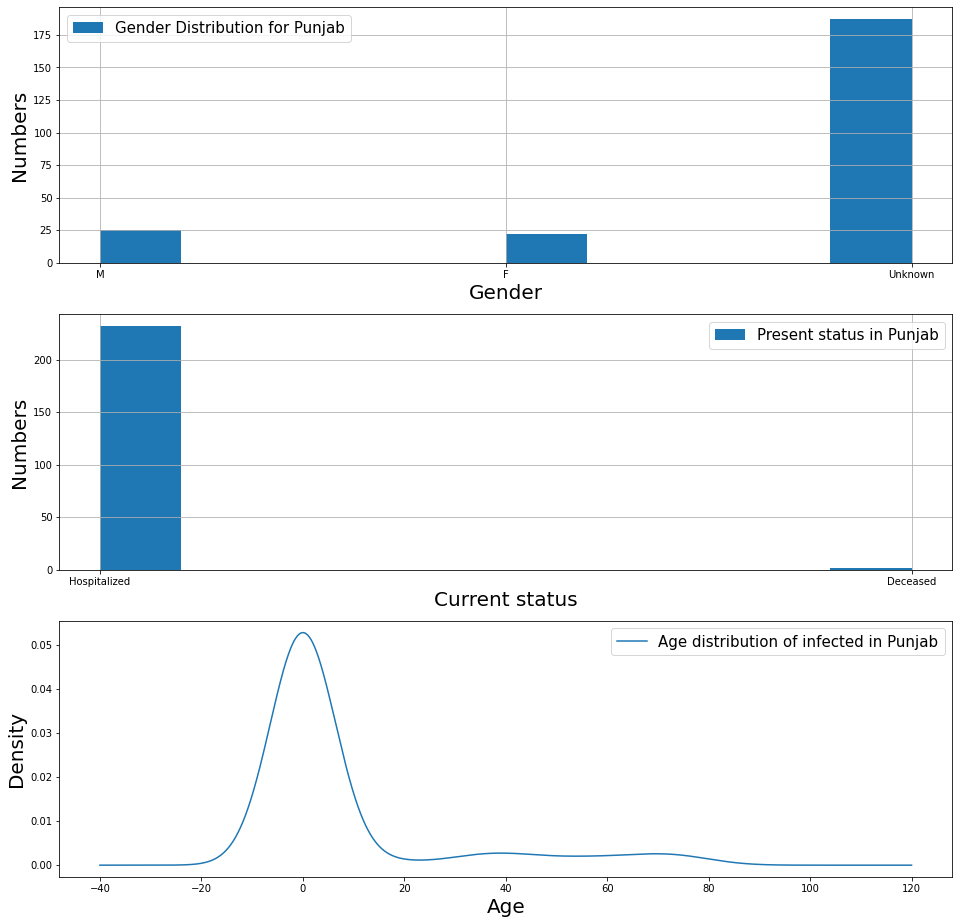

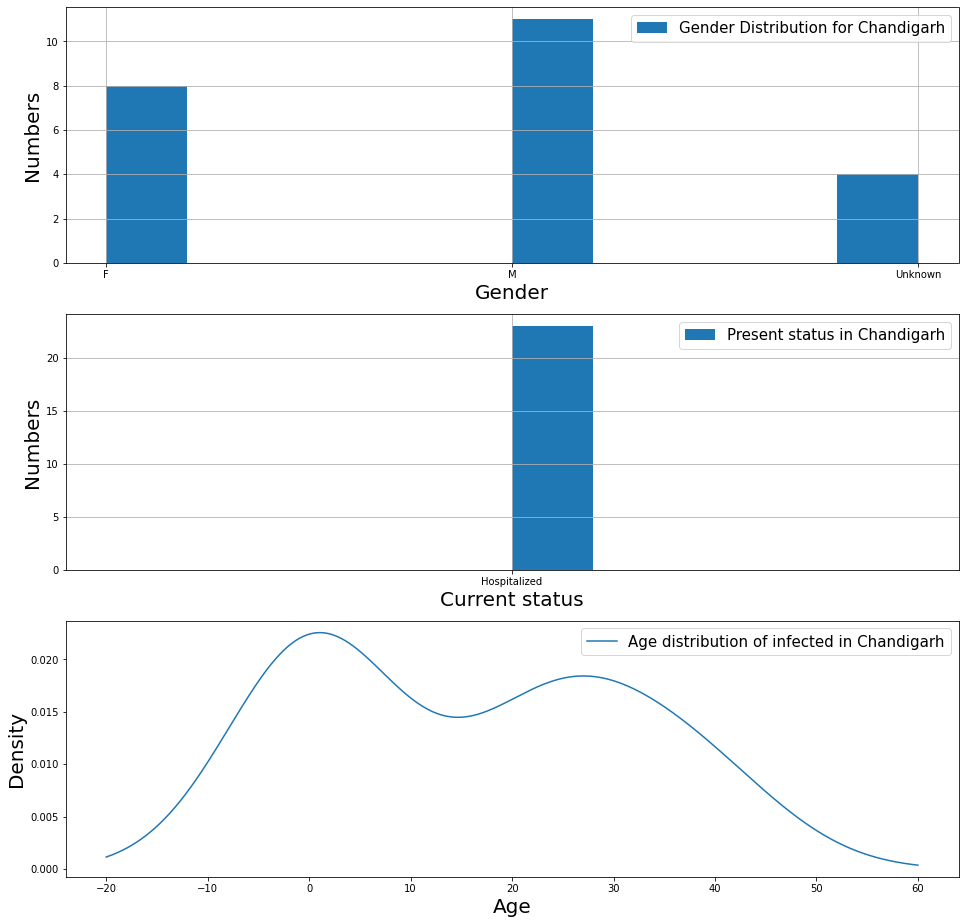

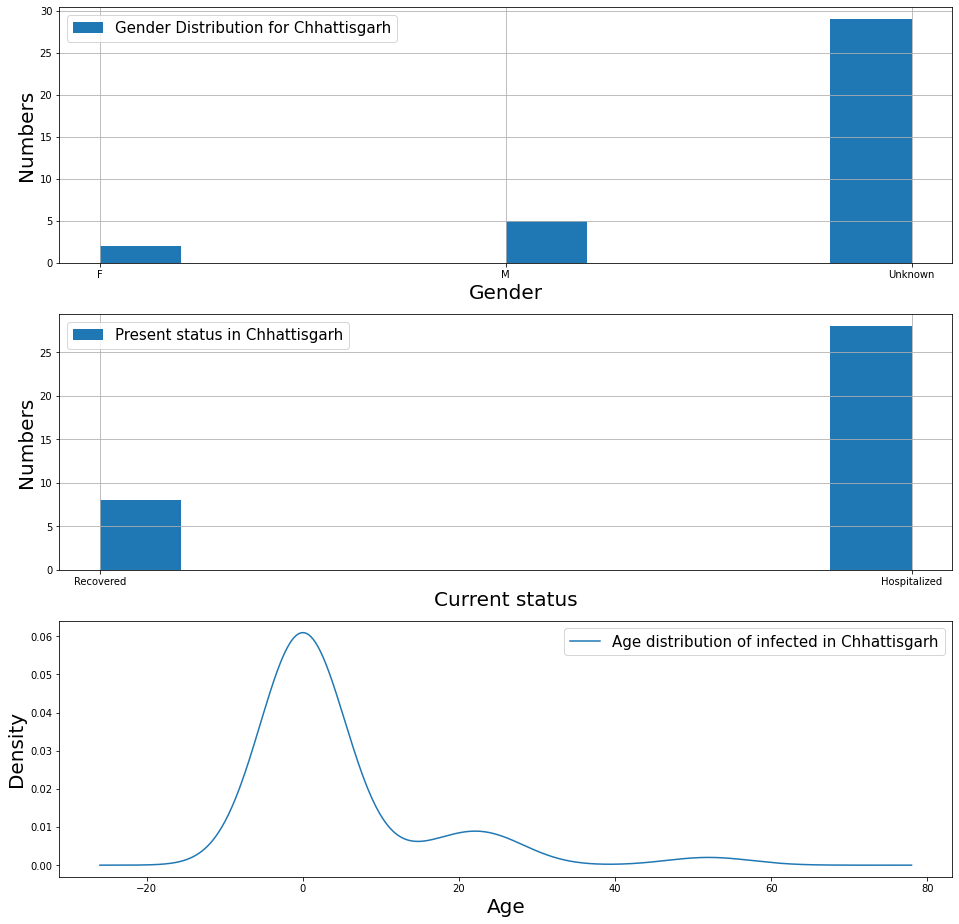

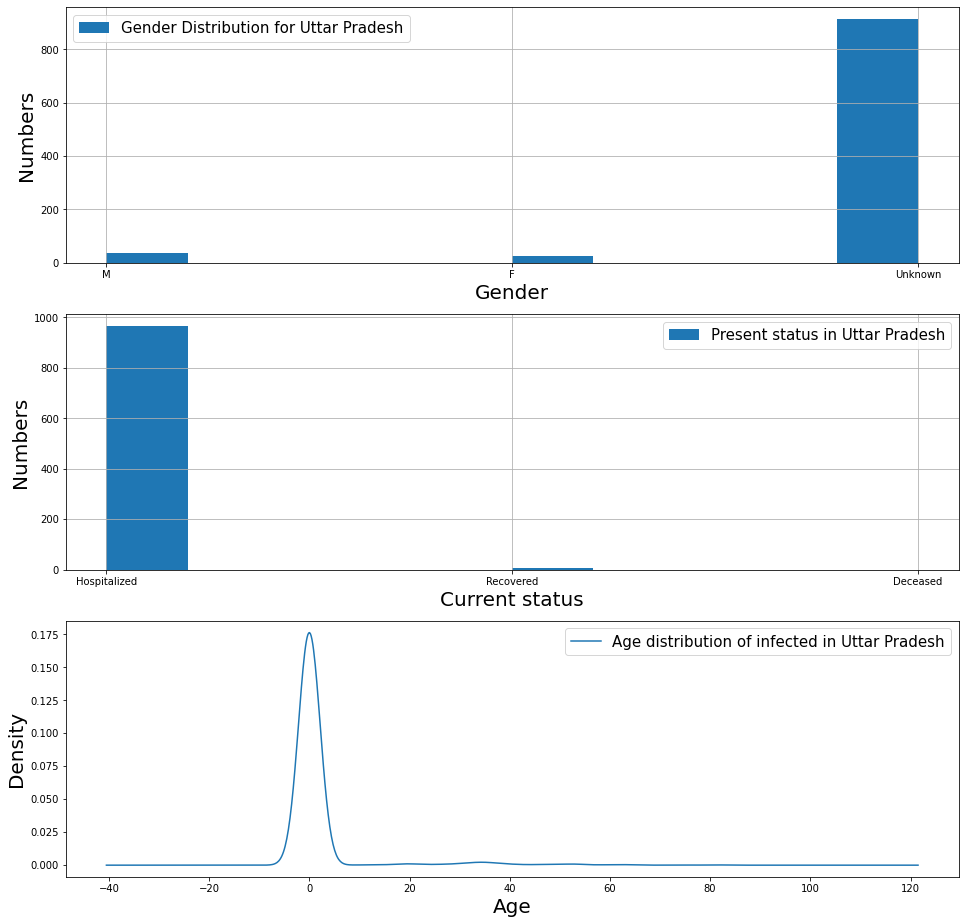

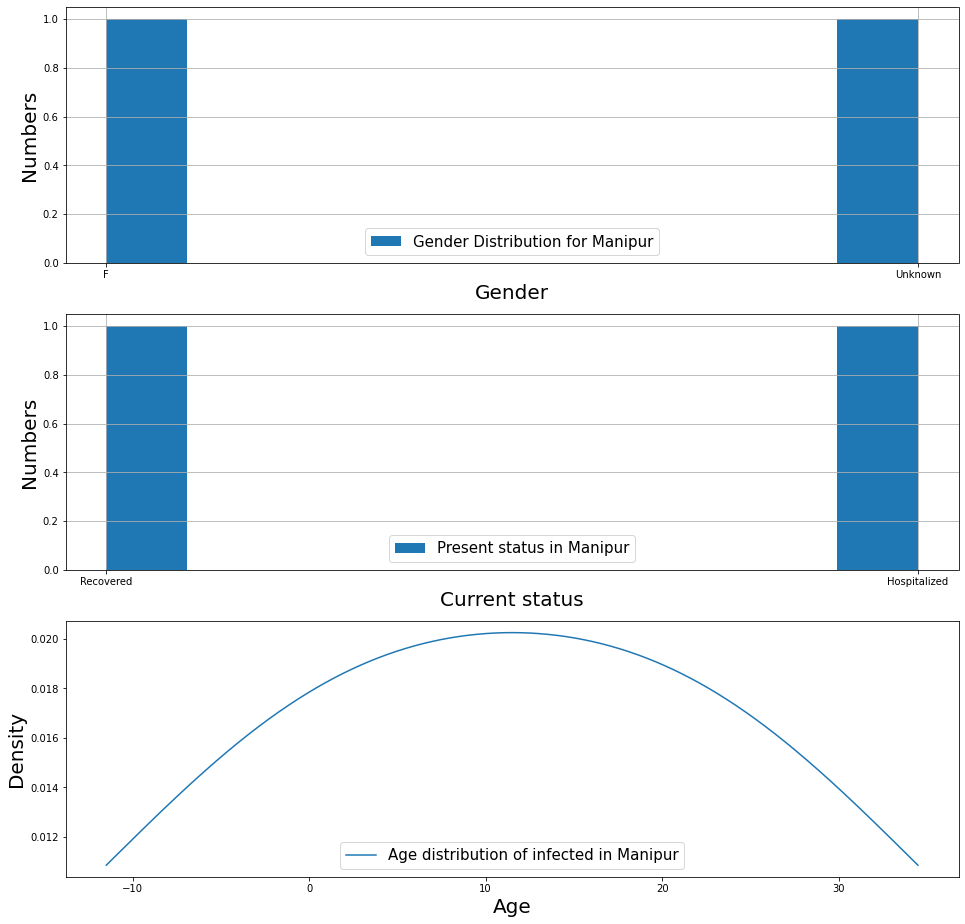

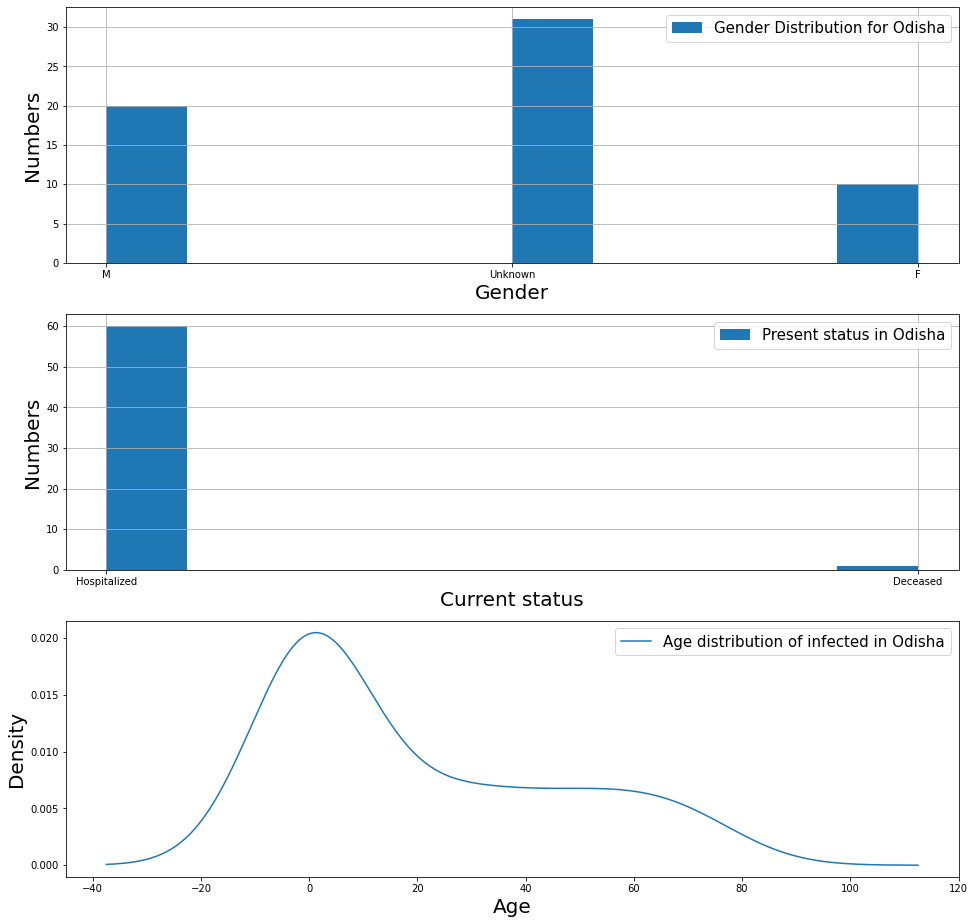

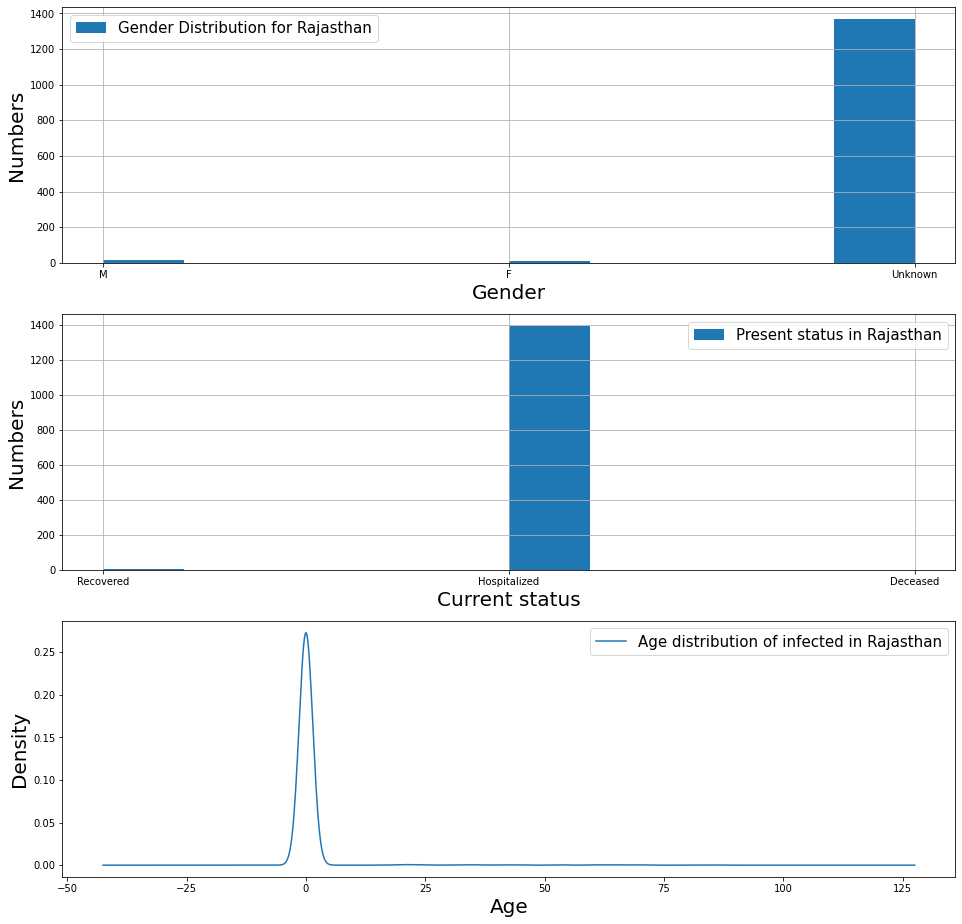

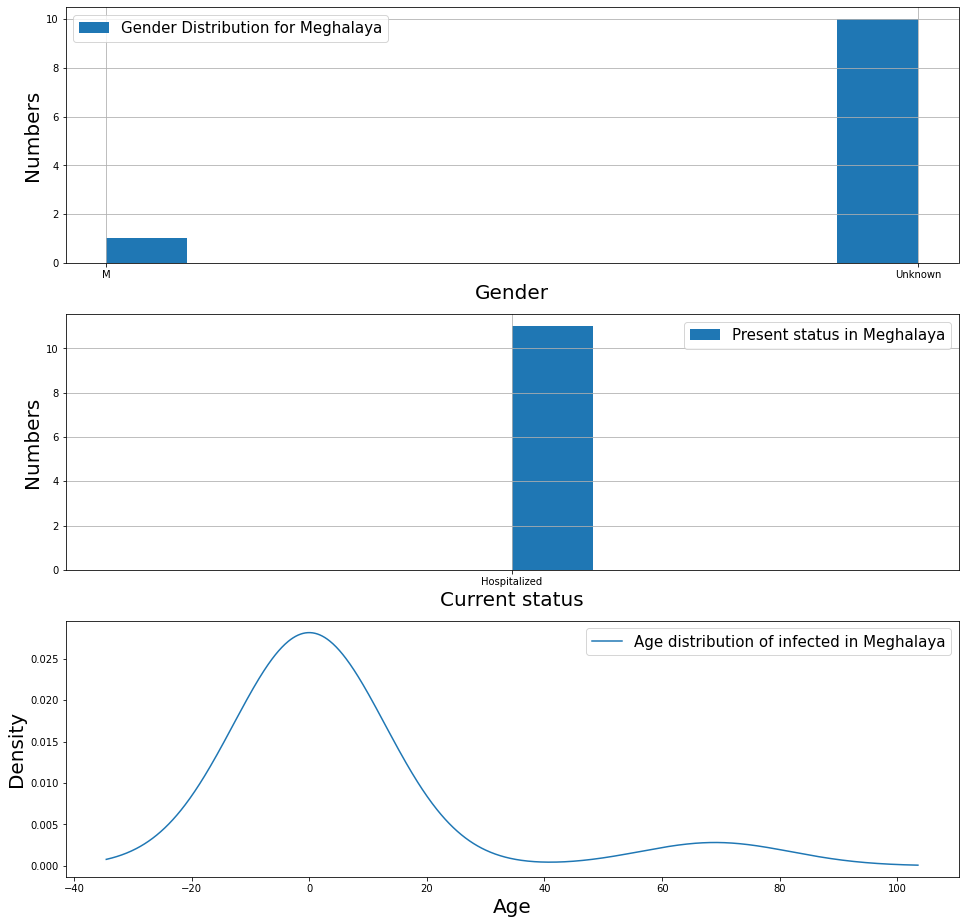

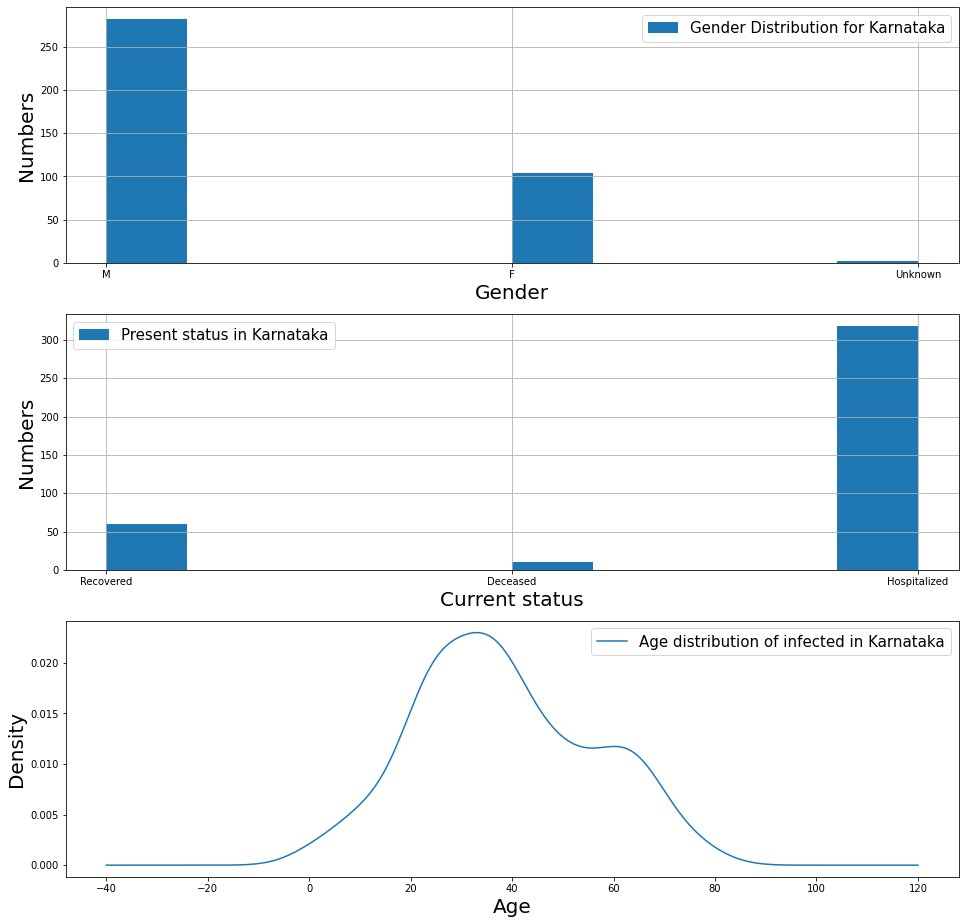

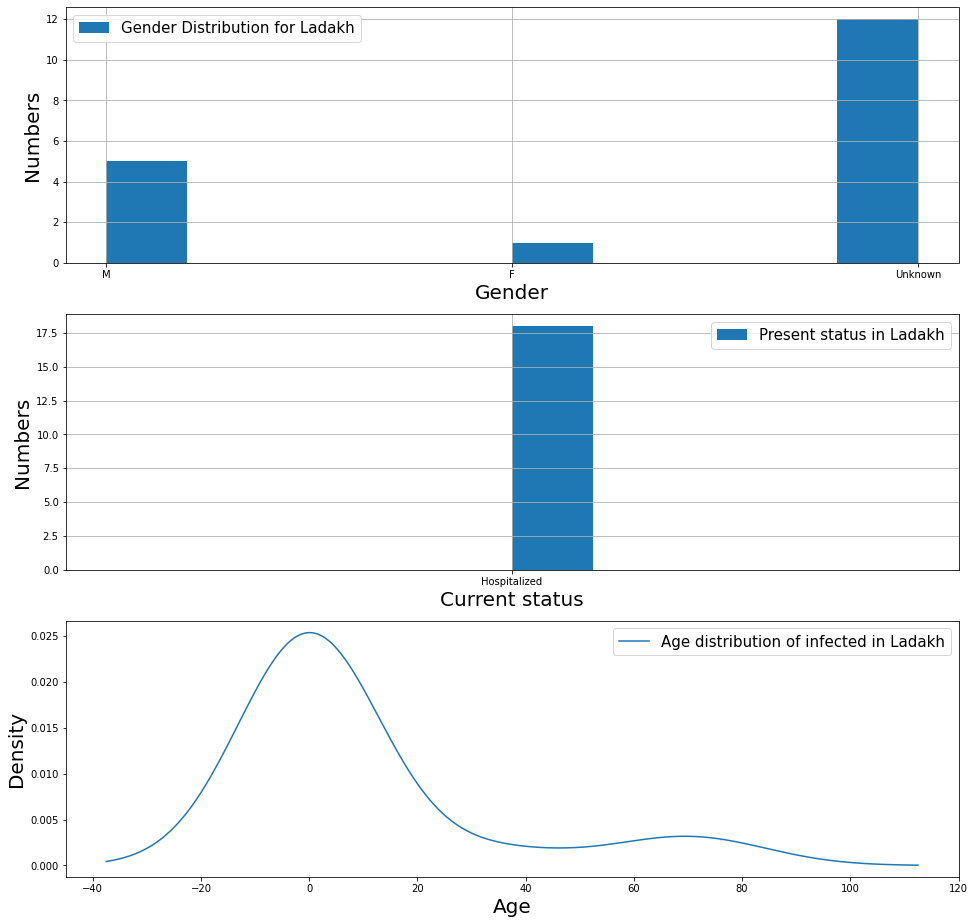

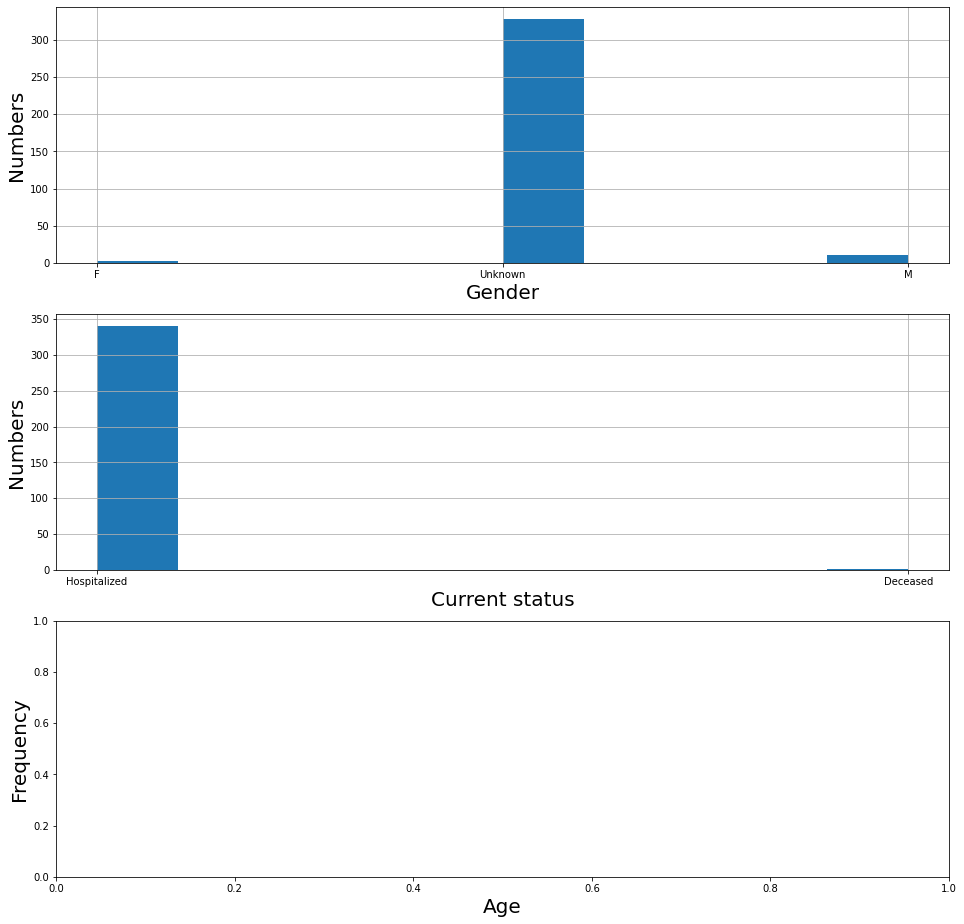

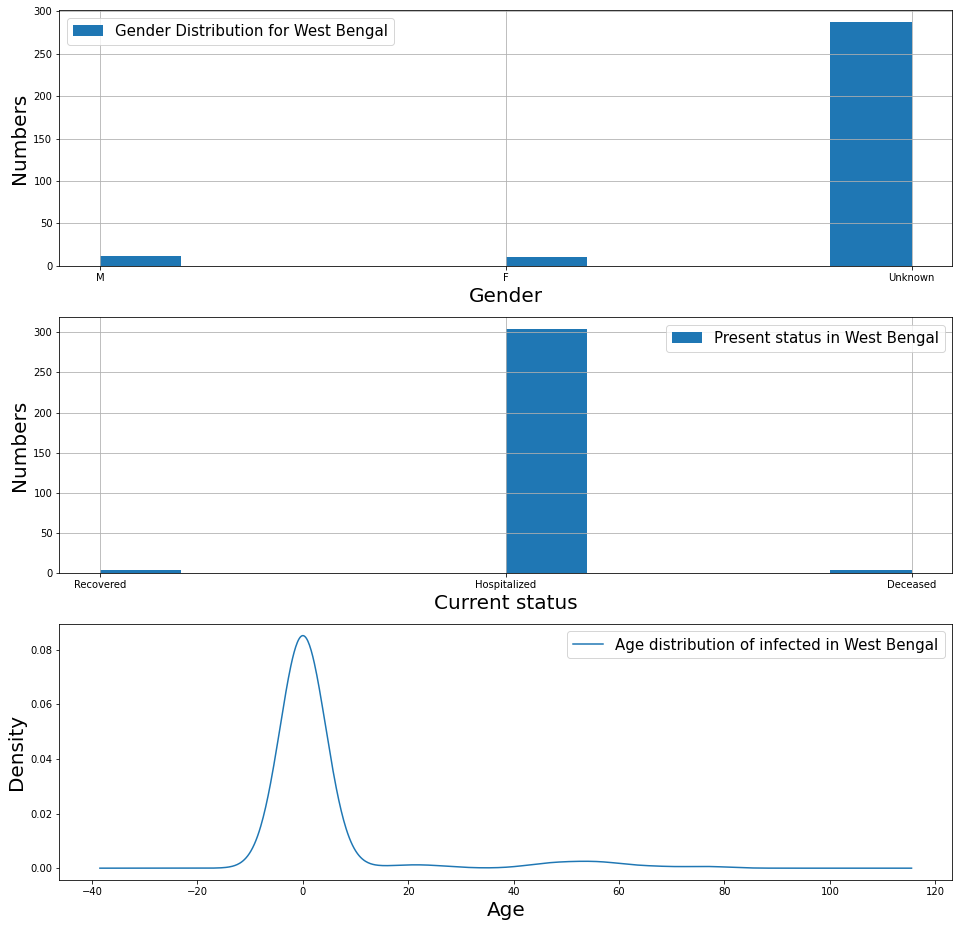

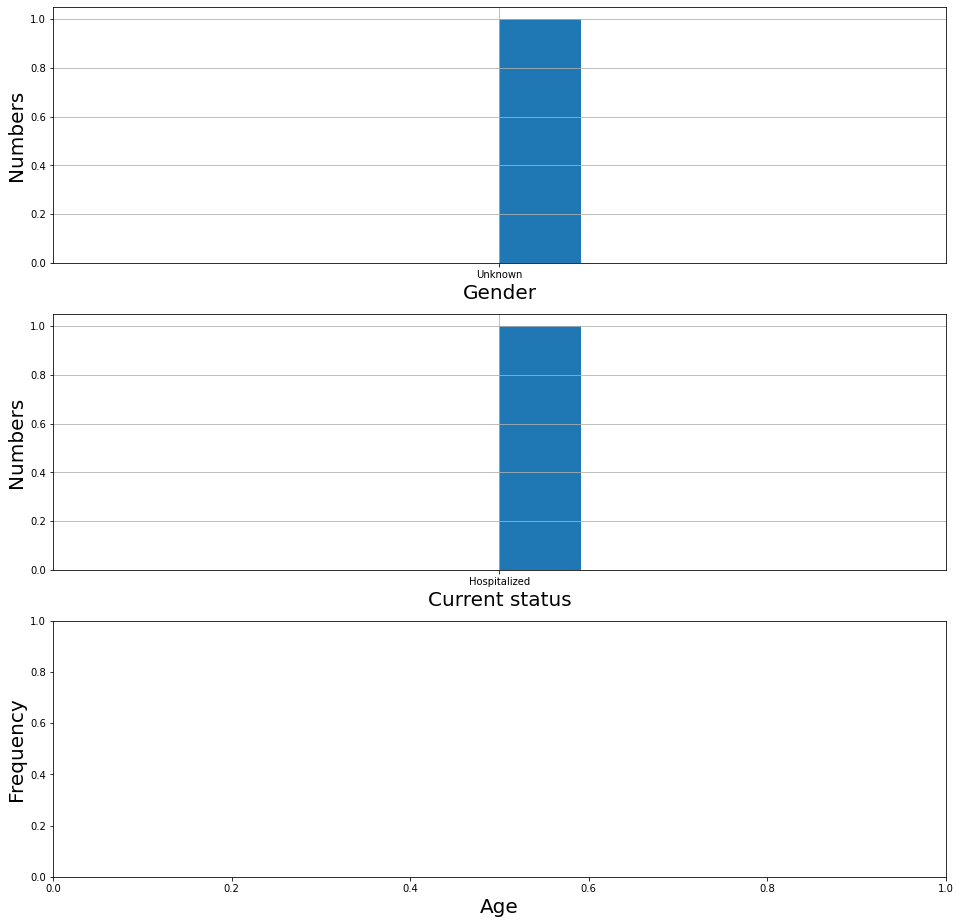

In [128]:
for state in States:
   p_state = plot_details(p_df,'detected_state',state)

In [129]:
#statewise_daily
tbody = soup.find_all('tbody')[4]
body = tbody.find_all('tr')

head_row = [i.text for i in body[0].find_all('td')]
head_row

['Date',
 'Status',
 '',
 'TT',
 'AN',
 'AP',
 'AR',
 'AS',
 'BR',
 'CH',
 'CT',
 'DN',
 'DD',
 'DL',
 'GA',
 'GJ',
 'HR',
 'HP',
 'JK',
 'JH',
 'KA',
 'KL',
 'LA',
 'LD',
 'MP',
 'MH',
 'MN',
 'ML',
 'MZ',
 'NL',
 'OR',
 'PY',
 'PB',
 'RJ',
 'SK',
 'TN',
 'TG',
 'TR',
 'UP',
 'UT',
 'WB']

In [130]:
contents = []

for i in range(len(body)):
    contents.append([i.text for i in body[i].find_all('td')])

s_df = pd.DataFrame(contents[2:len(contents)], columns=head_row)
s_df.head()

Date     Status    TT AN AP AR AS BR CH  ... PY PB RJ SK TN TG TR  UP UT WB
0  14-Mar-20  Confirmed    81  0  1  0  0  0  0  ...  0  1  3  0  1  1  0  12  0  0
1  14-Mar-20  Recovered     9  0  0  0  0  0  0  ...  0  0  1  0  0  0  0   4  0  0
2  14-Mar-20   Deceased     2  0  0  0  0  0  0  ...  0  0  0  0  0  0  0   0  0  0
3  15-Mar-20  Confirmed    27  0  0  0  0  0  0  ...  0  0  1  0  0  2  0   1  0  0
4  15-Mar-20  Recovered     4  0  0  0  0  0  0  ...  0  0  2  0  0  1  0   0  0  0

[5 rows x 41 columns]

In [0]:
from scipy.optimize import curve_fit
state_dict = {'TT':'India', 'AN': 'Andaman & Nicobar',  'AP':'Andhra Pradesh', 'AR': 'Arunachal Pradesh', 'AS': 'Assam',
              'BR': 'Bihar', 'CH':'Chandigarh', 'CT':'Chhattisgarh', 'DN': 'Dadra and Nagar Haveli', 'DD': 'Daman and Diu',
              'DL':'Delhi', 'GA': 'Goa', 'GJ':'Gujarat', 'HR':'Haryana', 'HP':'Himachal Pradesh', 'JK':'Jammu & Kashmir',
              'JH':'Jharkhand', 'KA':'Karnataka','KL':'Kerala','LA': 'Ladakh', 'LD': 'Lakshadweep', 'MP':'Madhya Pradesh',
              'MH':'Maharastra','MN':'Manipur', 'ML':'Meghalaya', 'MZ':'Mizoram', 'NL':'Nagaland', 'OR':'Orissa', 'PY':'Puducherry',
              'PB':'Punjab', 'RJ':'Rajasthan', 'SK':'Sikkim', 'TN':'Tamil Nadu', 'TG':'Telangana', 'TR':'Tirupura', 'UP':'Uttar Pradesh',
               'UT':'Uttrakhand', 'WB':'West Bengal'}
def state_progress(dataframe, state,N):
  state_df = dataframe[["Date", "Status",state]] 
  state_confirmed = state_df[state_df['Status']=='Confirmed']
  state_confirmed.rename(columns={state: 'Confirmed'},inplace=True)
  state_confirmed.drop(['Status'], axis=1, inplace=True)
  state_recovered = state_df[state_df['Status']=='Recovered']
  state_recovered.rename(columns={state: 'Recovered'},inplace=True)
  state_recovered.drop(['Status'], axis=1, inplace=True)
  state_deceased = state_df[state_df['Status']=='Deceased']
  state_deceased.rename(columns={state: 'Deceased'},inplace=True)
  state_deceased.drop(['Status'], axis=1, inplace=True)
  state_new = pd.merge(state_recovered,state_confirmed, how='outer' )
  state_new = pd.merge(state_new, state_deceased, how='outer' )
  try:
    state_new.replace('', 0, inplace=True)
    state_new['Confirmed'] = state_new['Confirmed'].astype(str).astype(int)
    state_new['Deceased'] = state_new['Deceased'].astype(str).astype(int)
    state_new['Recovered'] = state_new['Recovered'].astype(str).astype(int)
    state_new['Date']= pd.to_datetime(state_new['Date']) 
    state_new['Date'] = state_new['Date'].dt.date
    state_new['Total_Confirmed'] = state_new[['Confirmed']].cumsum()
    state_new['Total_Recovered'] = state_new[['Recovered']].cumsum()
    state_new['Total_Deceased'] = state_new[['Deceased']].cumsum()

    x=np.array(range(state_new.shape[0]))
    y=state_new['Total_Confirmed'].values
    #print(len(x))

 
    def func(x,a,b):
      return a*2**(x/b)
  
    try:
        popt, pcov = curve_fit(func,xdata=x,ydata=y)
    except:
        popt = np.array([0,0])
    
  
    #print(state, popt)
    orig = state_new['Total_Confirmed'].tolist()
    predictions = []
    for i in range(N):
      yfit = popt[0]*2**(i/popt[1])
      predictions.append(yfit)

    fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
    ax1.set_ylabel('Total infected',fontsize=20)
    ax1.set_xlabel('Days',fontsize=20)
    ax1.plot(orig,'--o',ms=10,label='Real Data in '+ state_dict[state])
    #ax1.plot(yfit,'-',label=f'Exponential fit')
    plt.plot(predictions, label='predictions; doubling time in days: '+ str(popt[1]))
    ax1.legend(fontsize=15)
  except:
    print('Error in '+ state+ ' database')
  return state_new

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


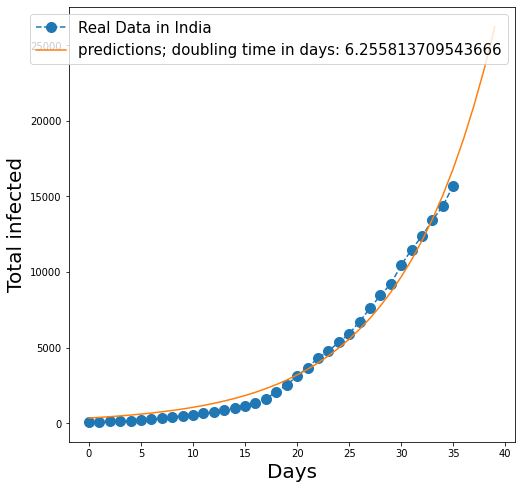

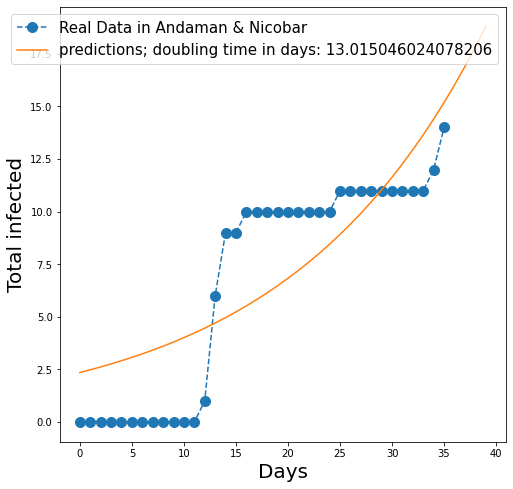

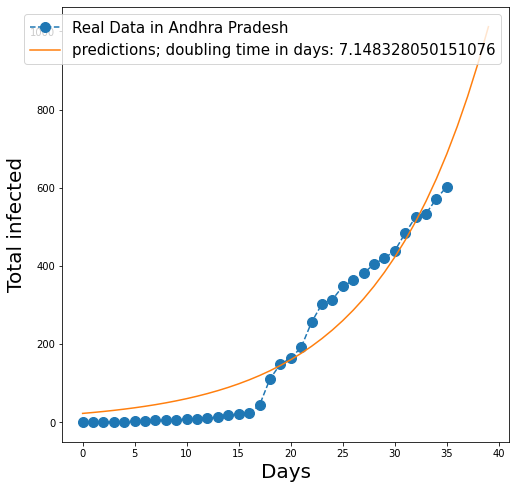

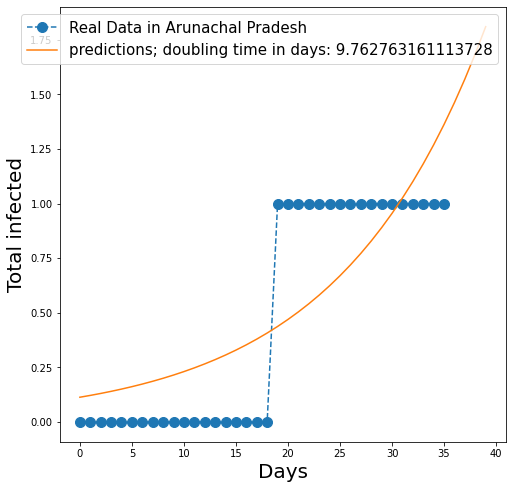

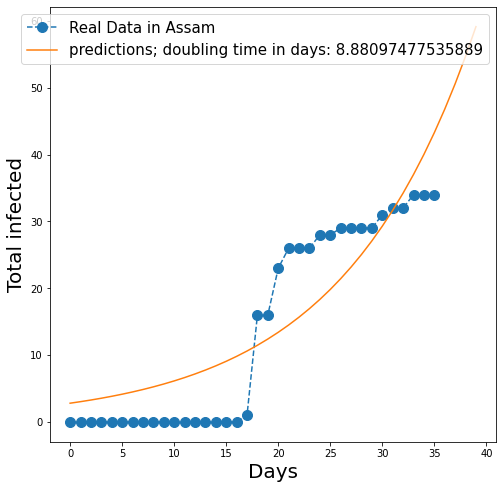

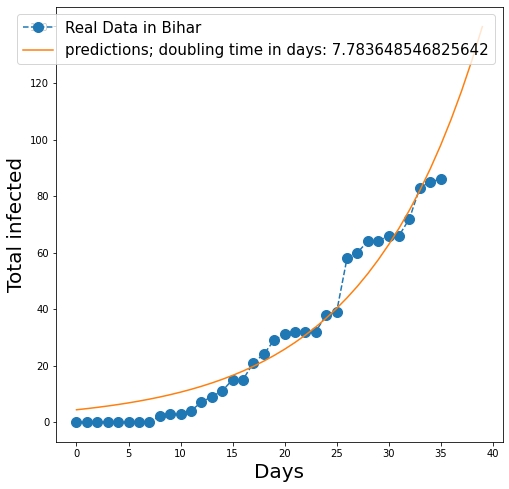

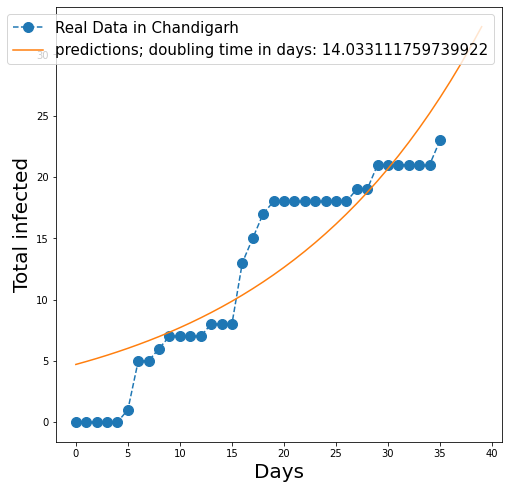

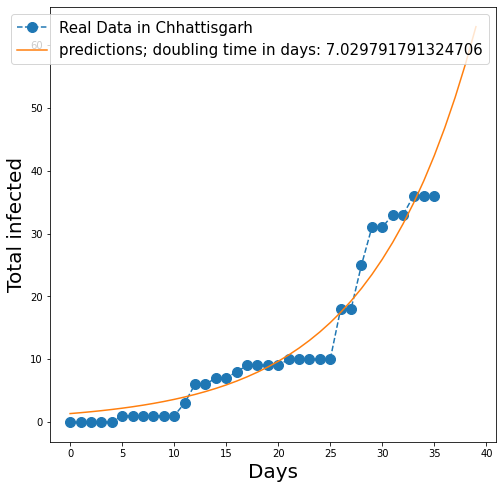

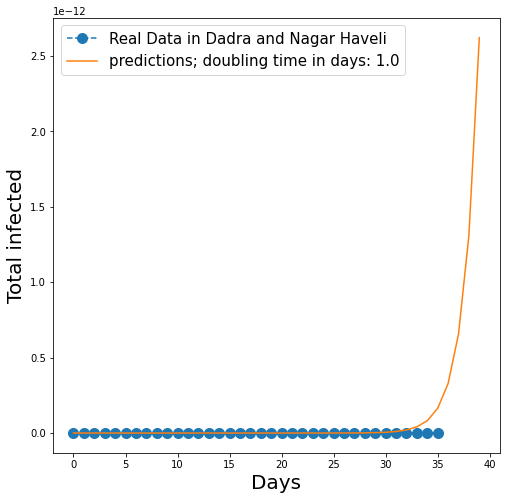

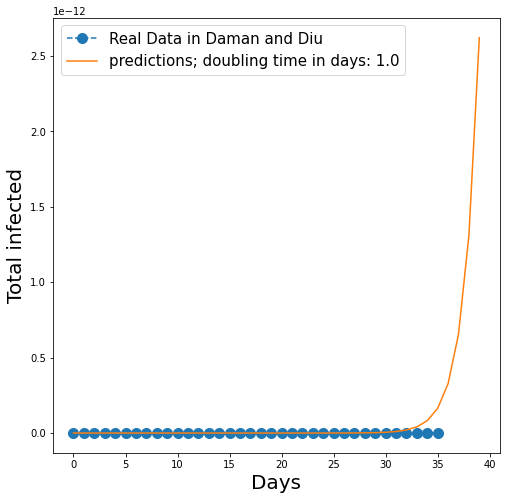

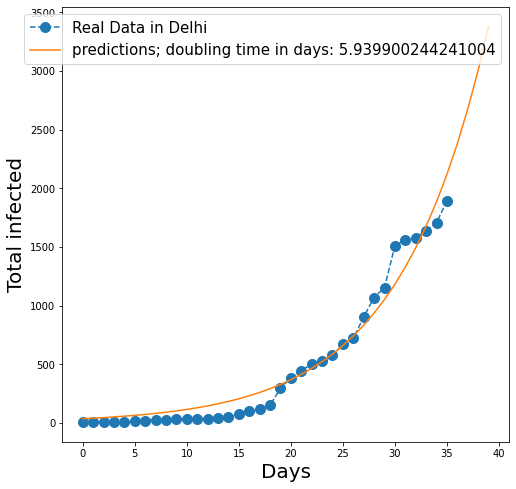

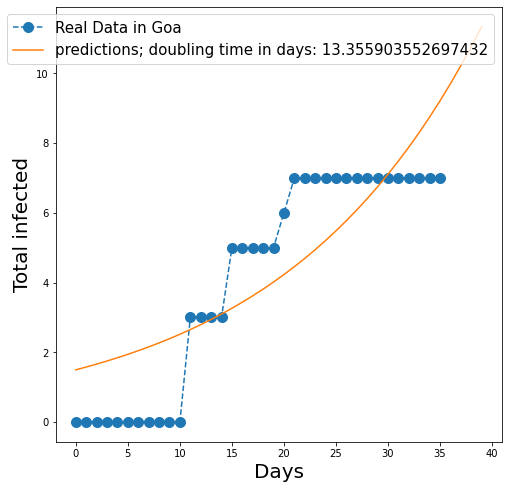

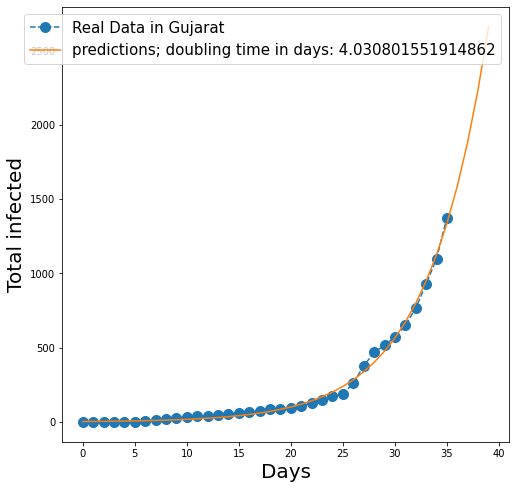

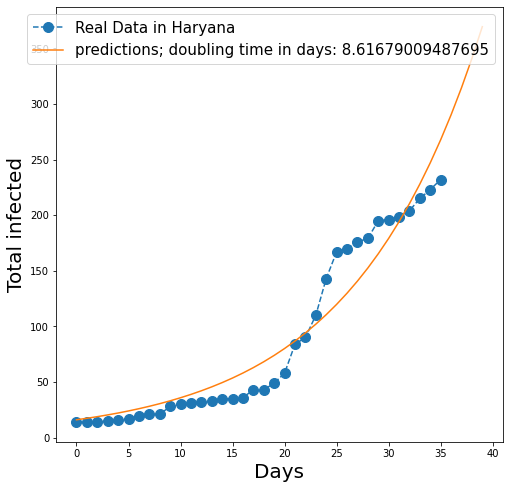

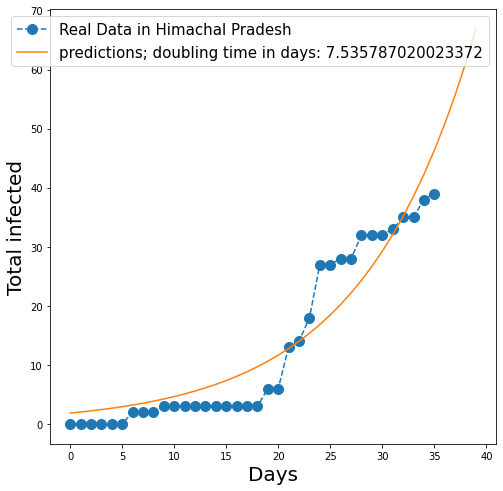

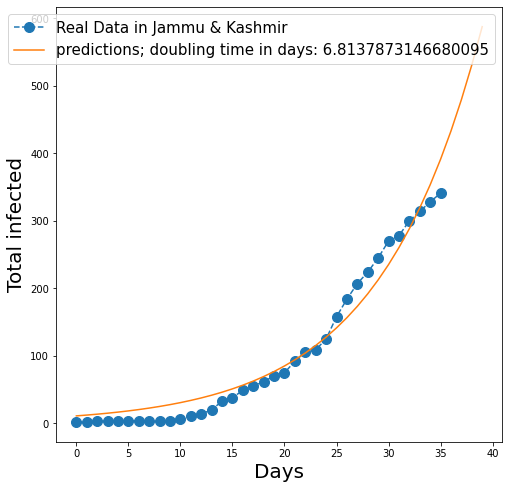

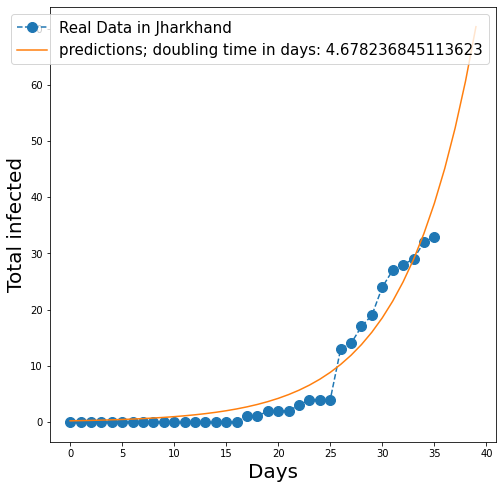

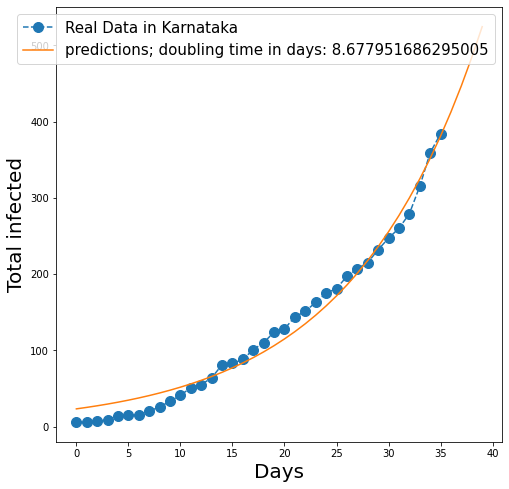

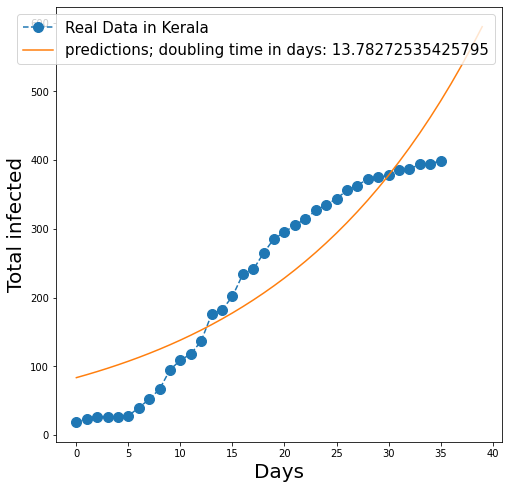

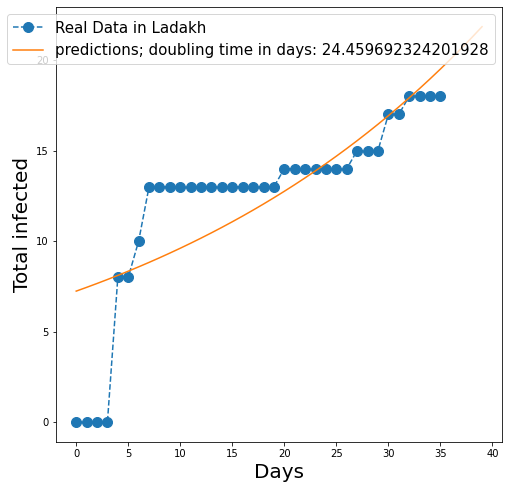

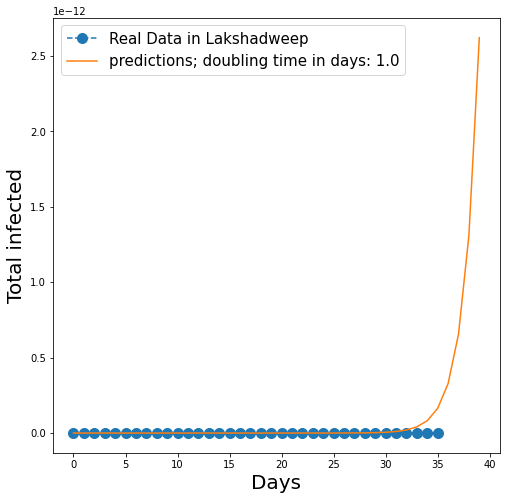

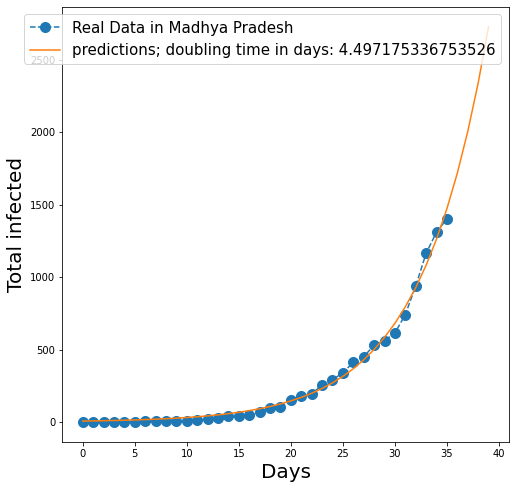

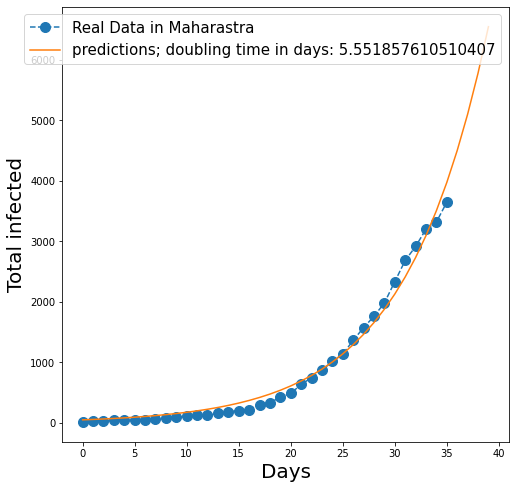

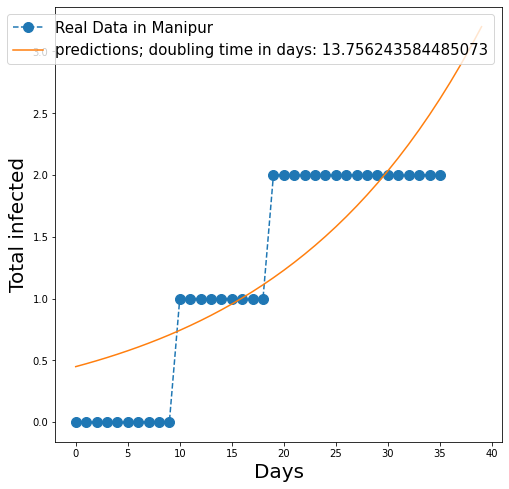

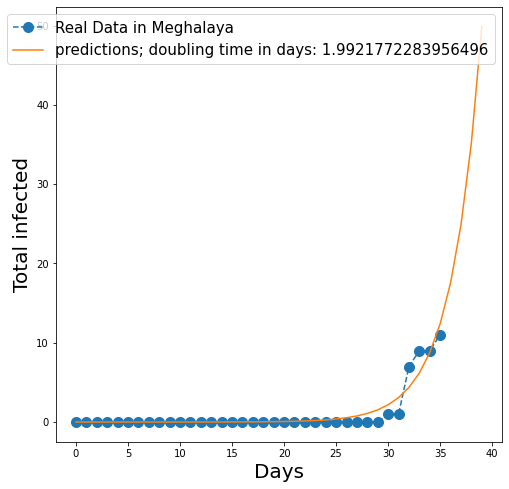

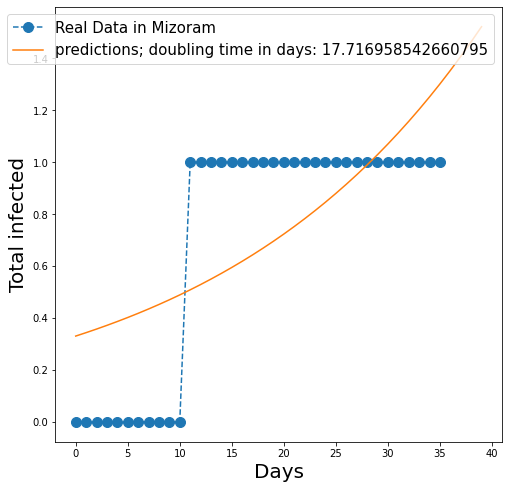

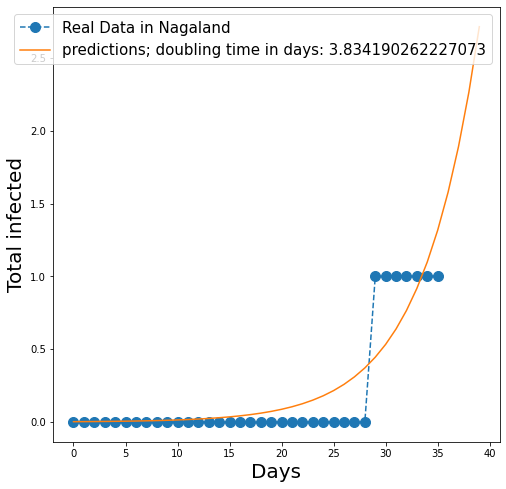

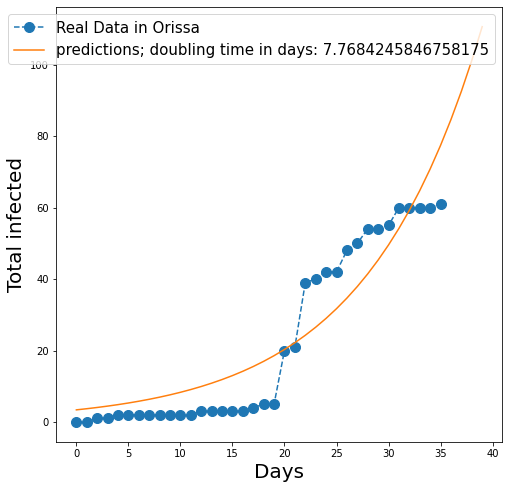

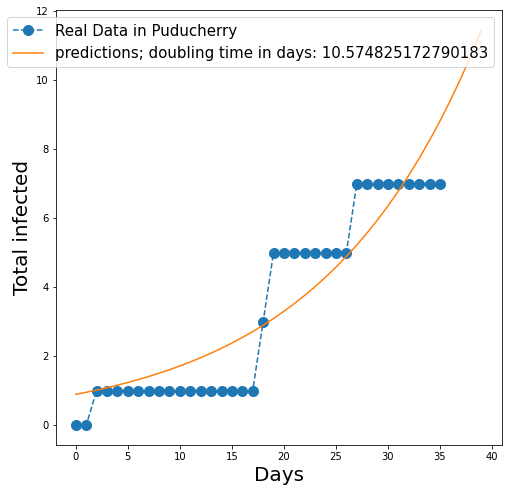

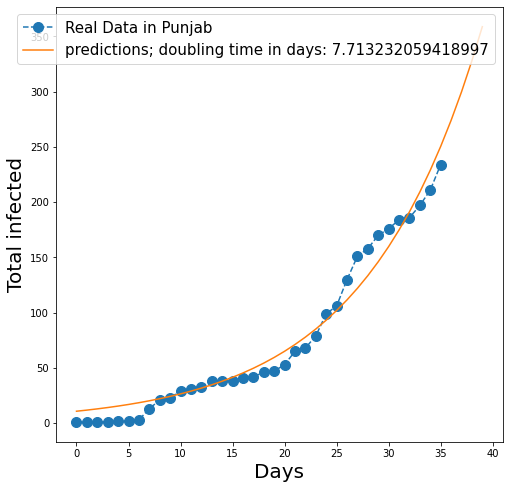

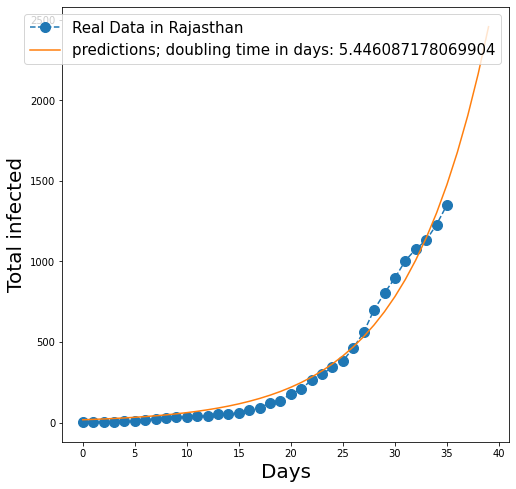

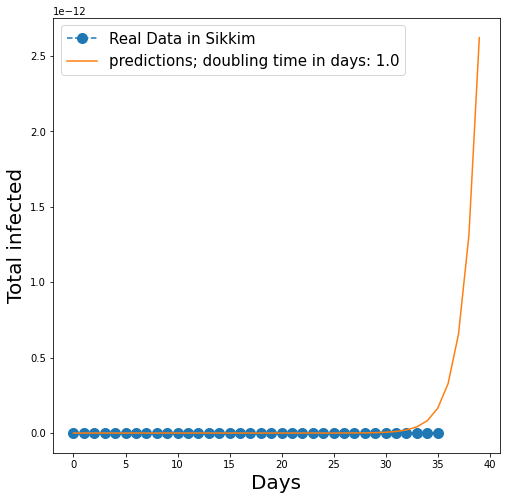

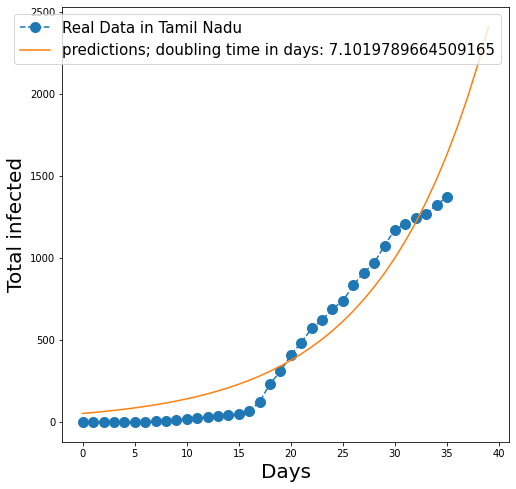

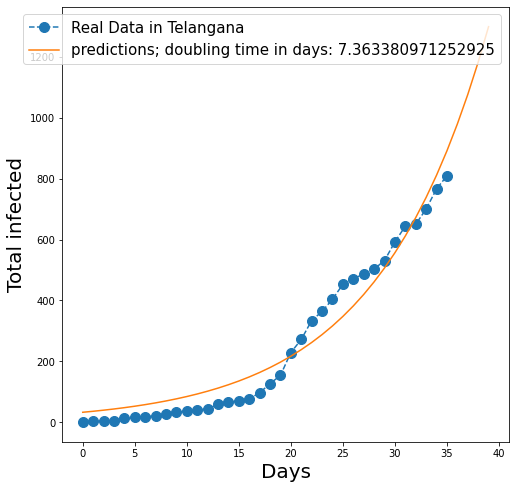

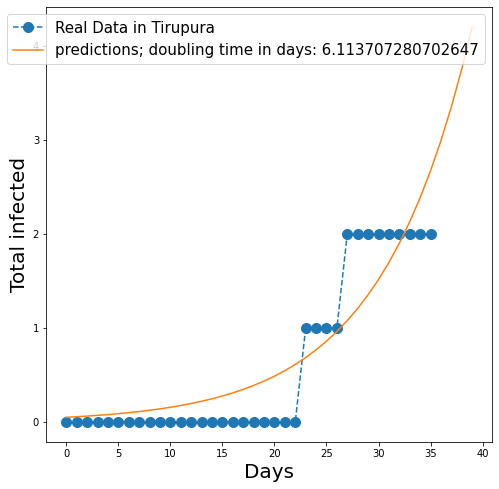

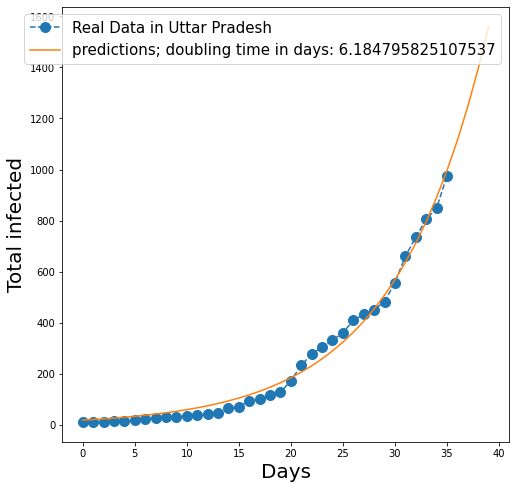

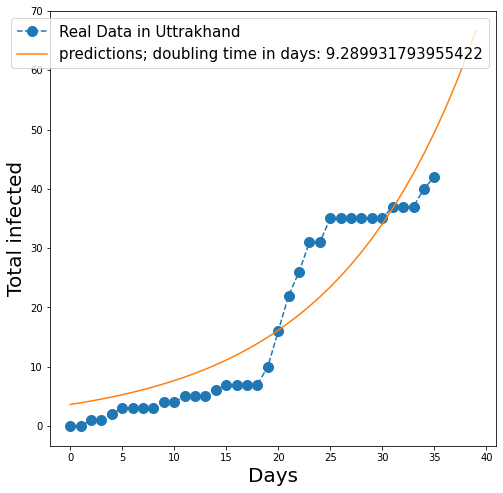

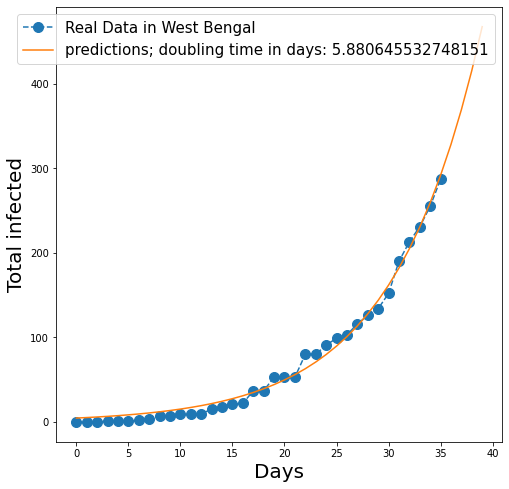

In [132]:
states = list(s_df.columns)
for state in states[3:]:
  state_AN = state_progress(s_df,state,40)
#state_AN

In [133]:
states[3:]

['TT',
 'AN',
 'AP',
 'AR',
 'AS',
 'BR',
 'CH',
 'CT',
 'DN',
 'DD',
 'DL',
 'GA',
 'GJ',
 'HR',
 'HP',
 'JK',
 'JH',
 'KA',
 'KL',
 'LA',
 'LD',
 'MP',
 'MH',
 'MN',
 'ML',
 'MZ',
 'NL',
 'OR',
 'PY',
 'PB',
 'RJ',
 'SK',
 'TN',
 'TG',
 'TR',
 'UP',
 'UT',
 'WB']

In [134]:
#Tests
tbody = soup.find_all('tbody')[6]
body = tbody.find_all('tr')

head_row = [i.text for i in body[0].find_all('td')]
head_row

['Updated On',
 'State',
 'Total Tested',
 'Positive',
 'Negative',
 'Unconfirmed',
 'Total People In Quarantine',
 'Total People Released From Quarantine',
 'Num Isolation Beds',
 'Num ICU Beds',
 'Num Ventilators',
 'Num Calls State Helpline',
 'Source',
 'Source2',
 'Positive rate by tests',
 'Tests per thousand',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [135]:
contents = []

for i in range(len(body)):
    contents.append([i.text for i in body[i].find_all('td')])

tests_df = pd.DataFrame(contents[2:len(contents)], columns=head_row)
tests_df.replace('', 0, inplace=True)
tests_df['Updated On']= pd.to_datetime(tests_df['Updated On']) #,format='%d/%m/%Y') 
tests_df['Updated On'] = tests_df['Updated On'].dt.date
tests_df['Total Tested'] = tests_df['Total Tested'].astype(str).astype(int)
tests_df['Positive'] = tests_df['Positive'].astype(str).astype(int)
tests_df['Negative'] = tests_df['Negative'].astype(str).astype(int)
#tests_df['Positive_percent'] = tests_df['Positive']/tests_df['Total Tested'] * 100
tests_df.replace(0, np.NaN, inplace=True)
tests_df.head()

Updated On                        State  Total Tested  ...            
0  2020-04-17  Andaman and Nicobar Islands        1403.0  ... NaN NaN NaN
1  2020-04-18  Andaman and Nicobar Islands           NaN  ... NaN NaN NaN
2  2020-04-19  Andaman and Nicobar Islands           NaN  ... NaN NaN NaN
3  2020-02-04               Andhra Pradesh        1800.0  ... NaN NaN NaN
4  2020-10-04               Andhra Pradesh        6374.0  ... NaN NaN NaN

[5 rows x 32 columns]

In [0]:
def tests_state_wise(df,state):
  tests_done = df[df['State']==state]
  tests_done.plot.bar('Updated On', ['Total Tested','Positive','Negative'],title=state)
  tests_done['Positive_percent'] = tests_done['Positive']/tests_df['Total Tested'] * 100
  tests_done.plot.bar('Updated On', ['Positive_percent'], title=state)
  #plt.plot(tests_done['Total Tested', 'Positive', 'Negative'])
  return tests_done

In [137]:
tests_df.head()

Updated On                        State  Total Tested  ...            
0  2020-04-17  Andaman and Nicobar Islands        1403.0  ... NaN NaN NaN
1  2020-04-18  Andaman and Nicobar Islands           NaN  ... NaN NaN NaN
2  2020-04-19  Andaman and Nicobar Islands           NaN  ... NaN NaN NaN
3  2020-02-04               Andhra Pradesh        1800.0  ... NaN NaN NaN
4  2020-10-04               Andhra Pradesh        6374.0  ... NaN NaN NaN

[5 rows x 32 columns]

In [138]:
states

['Date',
 'Status',
 '',
 'TT',
 'AN',
 'AP',
 'AR',
 'AS',
 'BR',
 'CH',
 'CT',
 'DN',
 'DD',
 'DL',
 'GA',
 'GJ',
 'HR',
 'HP',
 'JK',
 'JH',
 'KA',
 'KL',
 'LA',
 'LD',
 'MP',
 'MH',
 'MN',
 'ML',
 'MZ',
 'NL',
 'OR',
 'PY',
 'PB',
 'RJ',
 'SK',
 'TN',
 'TG',
 'TR',
 'UP',
 'UT',
 'WB']

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


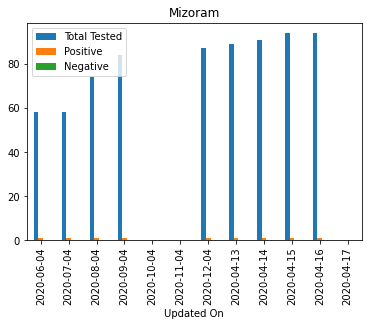

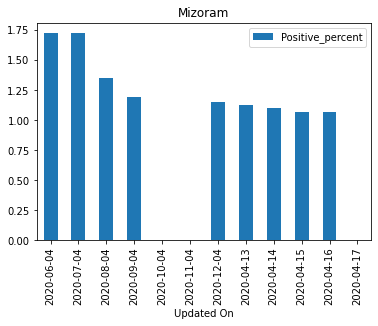

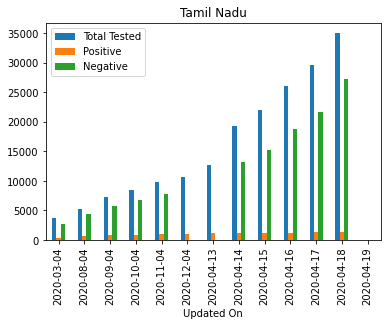

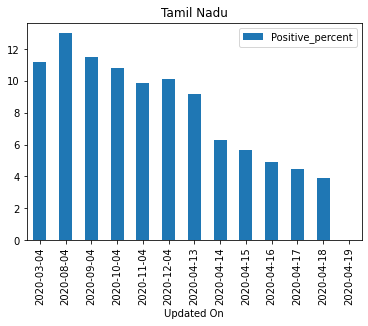

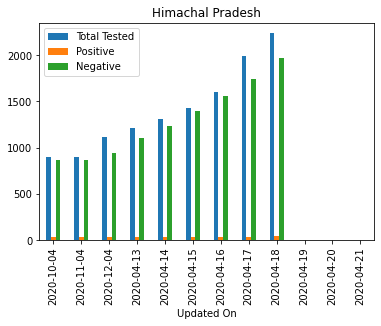

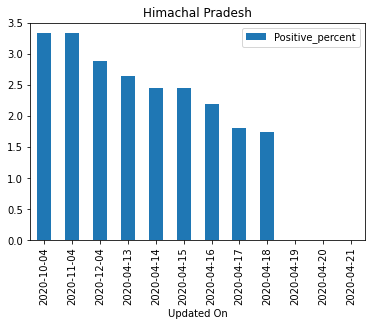

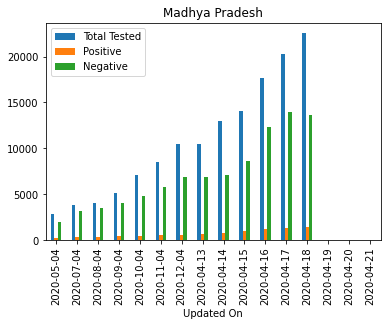

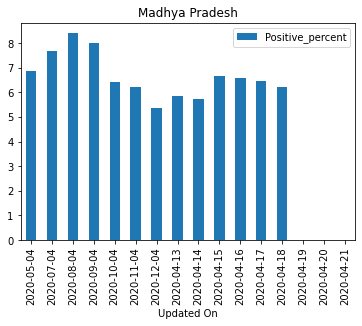

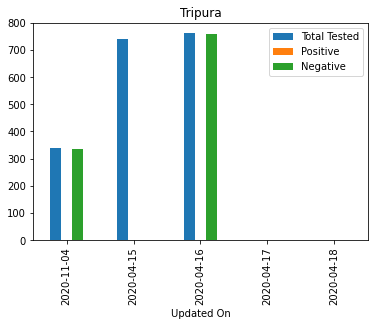

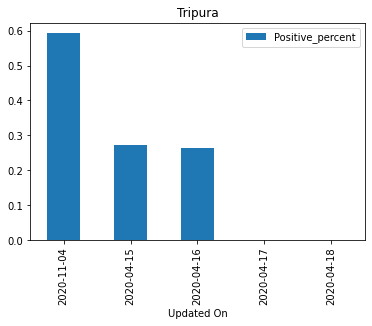

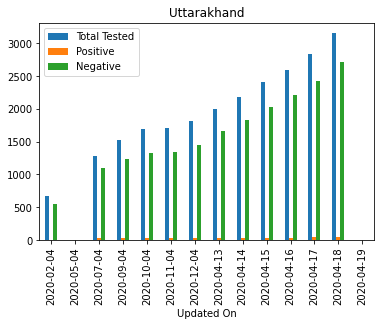

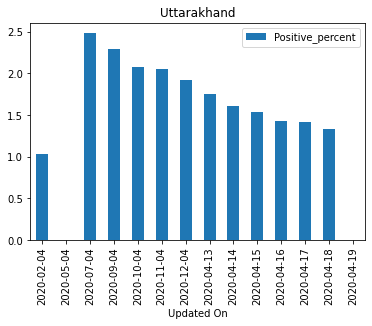

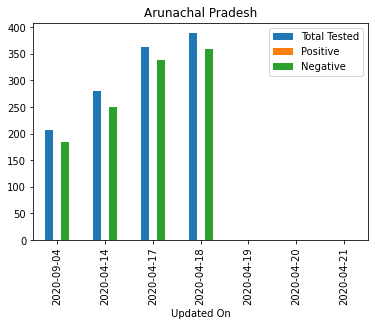

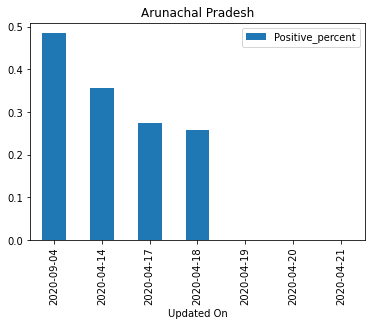

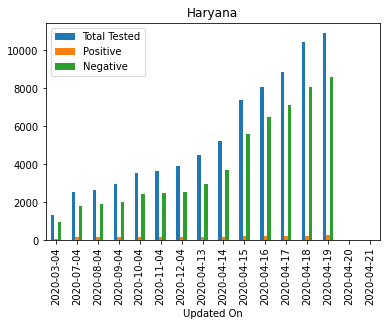

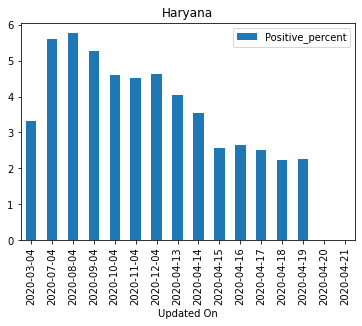

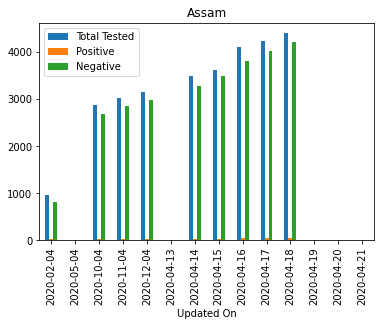

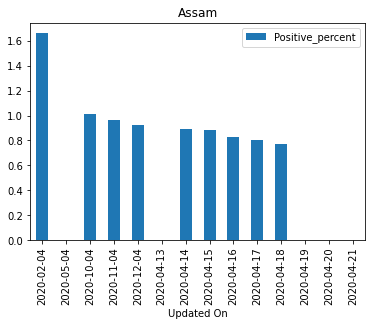

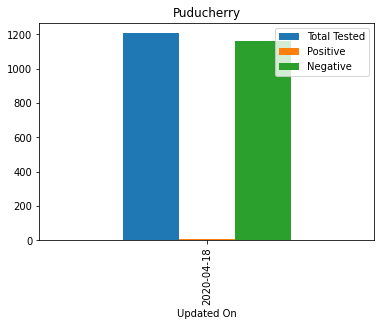

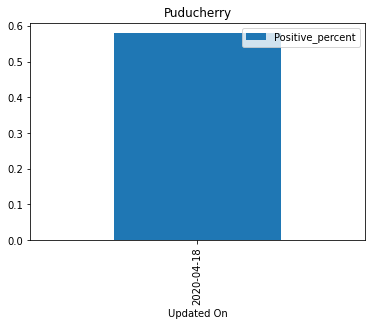

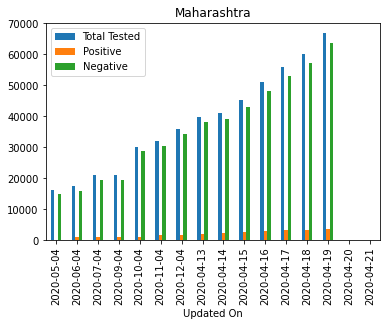

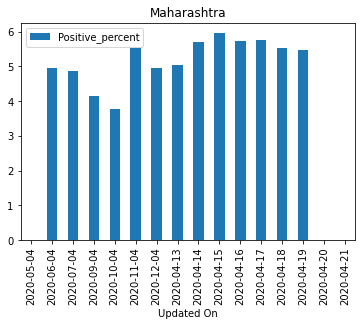

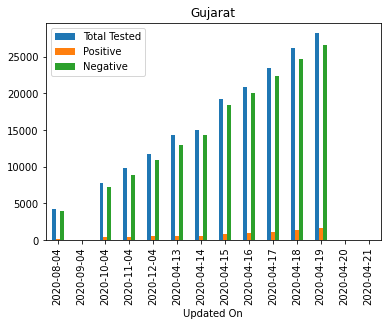

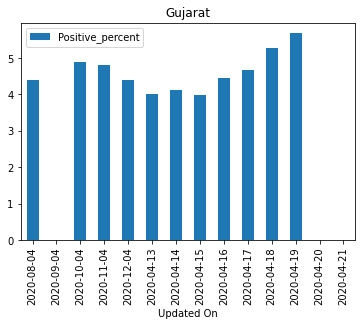

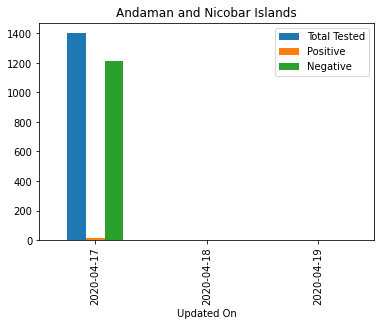

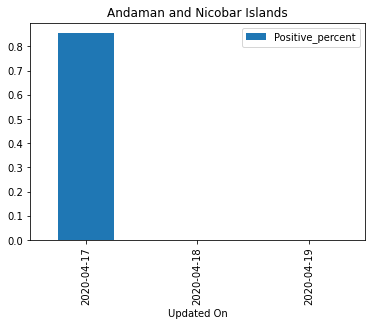

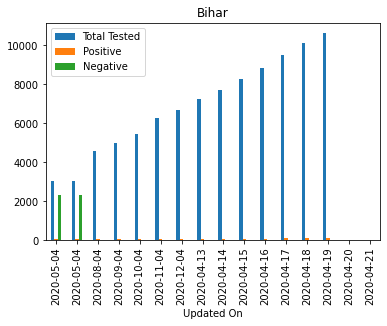

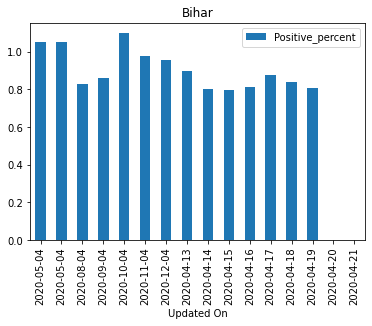

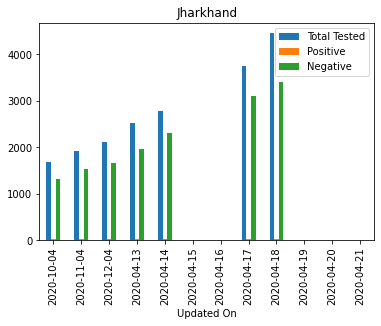

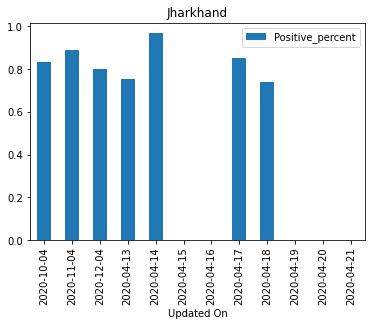

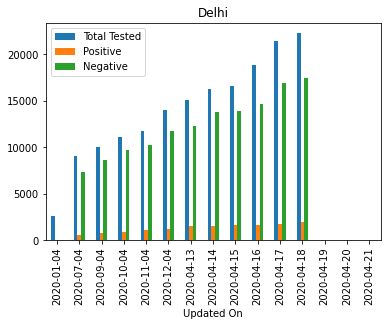

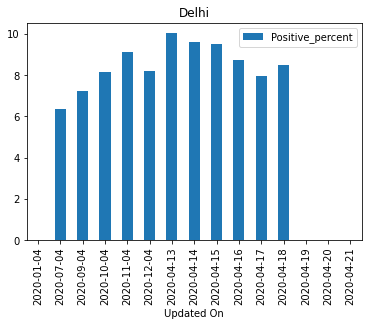

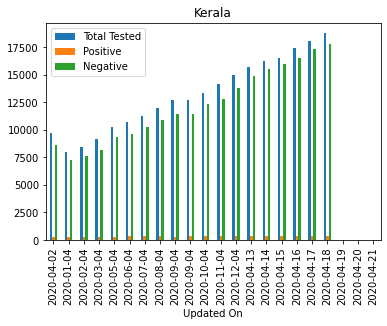

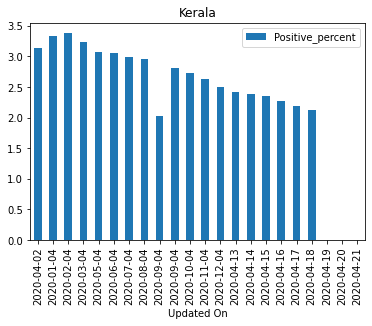

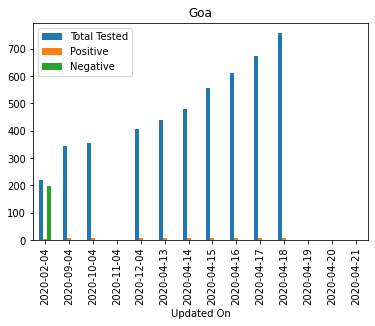

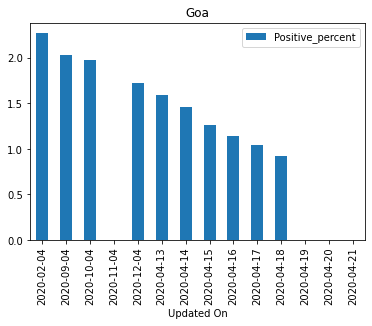

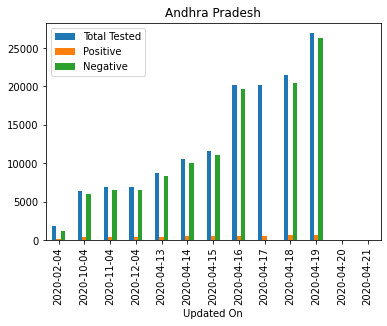

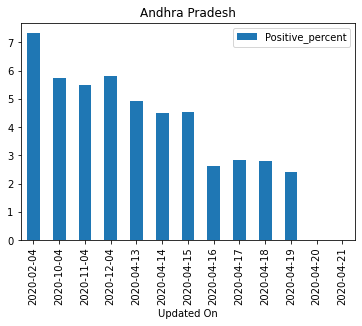

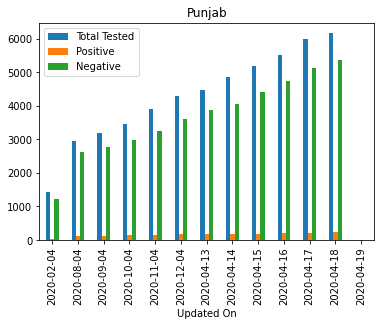

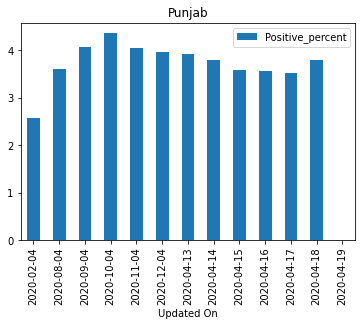

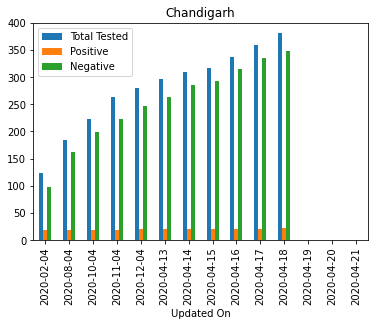

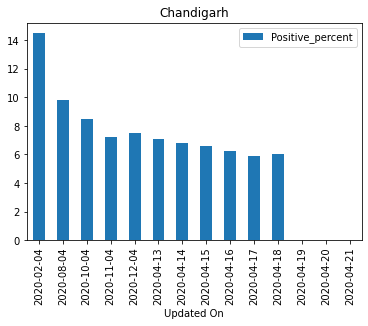

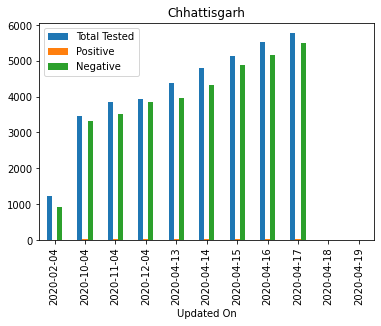

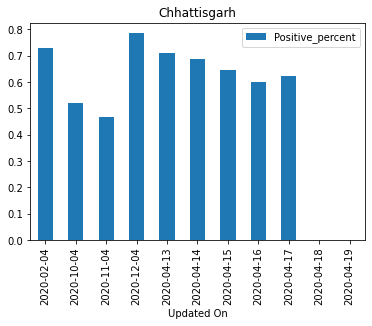

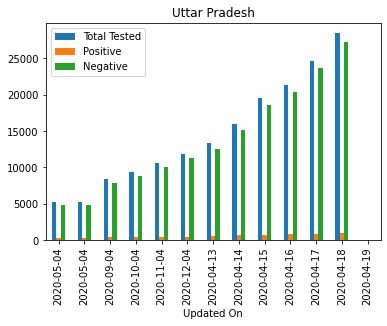

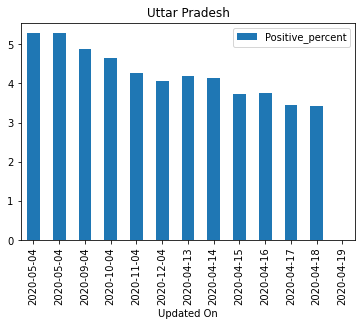

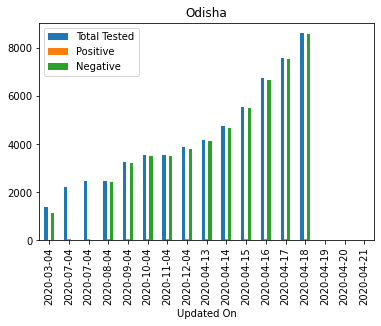

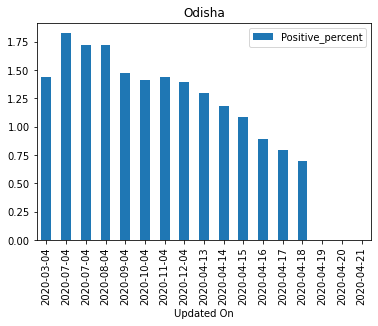

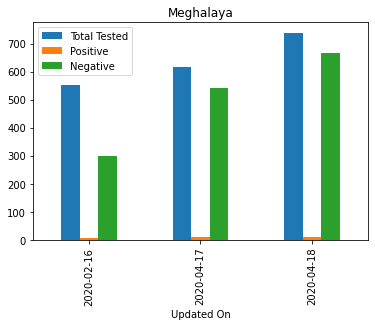

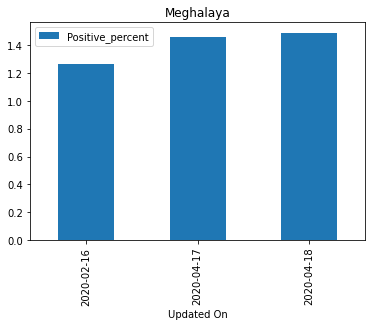

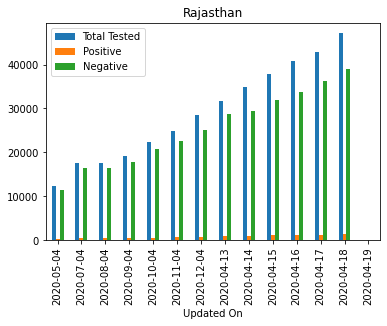

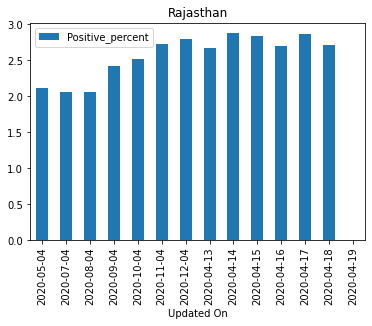

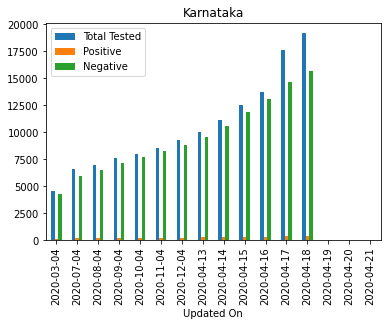

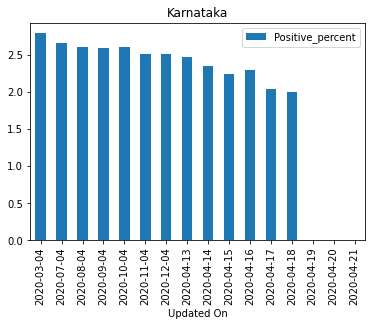

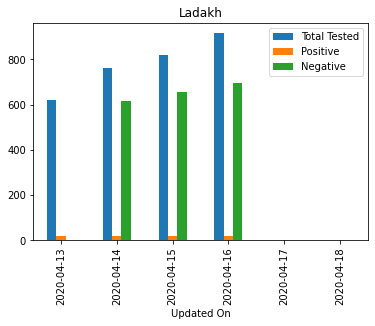

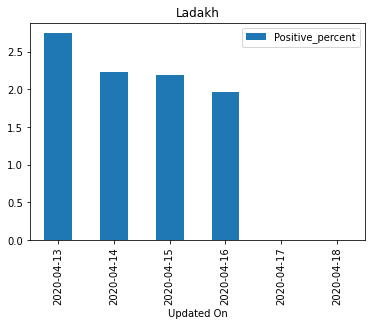

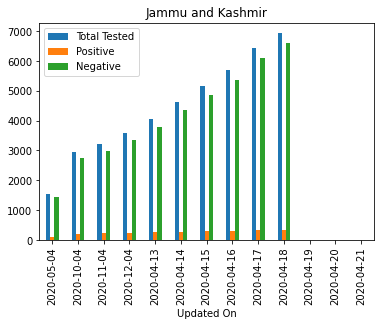

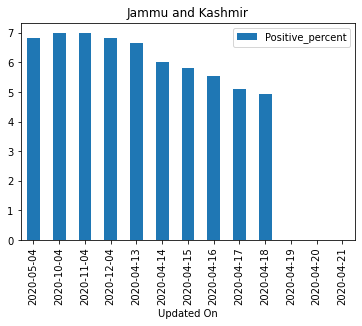

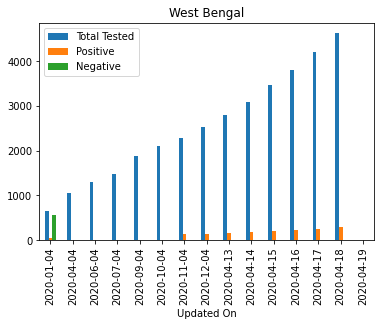

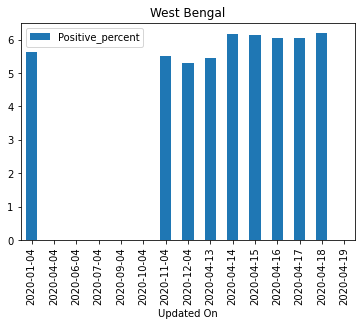

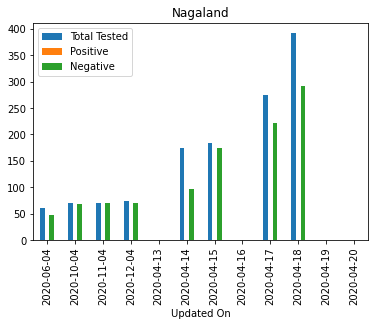

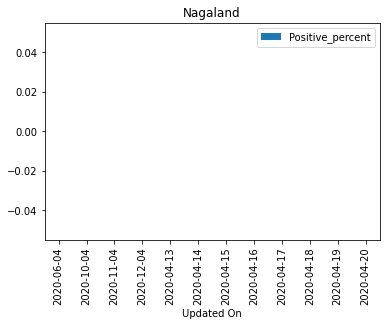

In [139]:
states = list(set(tests_df.State.values))
for state in states[1:]:
  tests = tests_state_wise(tests_df,state)

In [0]:
new_df = tests_df.loc[:,['Updated On','Total Tested', 'Positive', 'Negative', 'Unconfirmed']]


new_df = pd.pivot_table(new_df, index=['Updated On'], aggfunc=np.sum)
new_df['Positive_percent'] = new_df['Positive']/new_df['Total Tested'] * 100

In [141]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 1970-01-01 to 2020-12-04
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negative          24 non-null     float64
 1   Positive          24 non-null     float64
 2   Total Tested      24 non-null     float64
 3   Positive_percent  21 non-null     float64
dtypes: float64(4)
memory usage: 960.0+ bytes


In [0]:
new_df.sort_values(by=['Updated On'], inplace=True, ascending=True)

In [143]:
new_df

Negative  Positive  Total Tested  Positive_percent
Updated On                                                    
1970-01-01       0.0       0.0           0.0               NaN
2020-01-04    7824.0     302.0       11245.0          2.685638
2020-02-04   12622.0     510.0       14906.0          3.421441
2020-02-16     299.0       7.0         552.0          1.268116
2020-03-04   17242.0     898.0       20130.0          4.461003
2020-04-02    8586.0     306.0        9744.0          3.140394
2020-04-04       0.0       0.0        1042.0          0.000000
2020-04-13  167714.0    9389.0      210592.0          4.458384
2020-04-14  199078.0   10406.0      240098.0          4.334064
2020-04-15  221704.0   11409.0      265276.0          4.300804
2020-04-16  255022.0   12341.0      302949.0          4.073623
2020-04-17  264619.0   13435.0      338748.0          3.966075
2020-04-18  303875.0   14444.0      366311.0          3.943098
2020-04-19  124996.0    6234.0      143525.0          4.343494
2020-04-20       0.0       0.0           0.0               NaN
2020-04-21       0.0       0.0           0.0               NaN
2020-05-04   53149.0    1493.0       59455.0          2.511143
2020-06-04   25462.0    1196.0       29698.0          4.027207
2020-07-04   65229.0    3014.0       79123.0          3.809259
2020-08-04   52602.0    2473.0       63058.0          3.921786
2020-09-04  103024.0    4939.0      122239.0          4.040445
2020-10-04  134416.0    6490.0      155907.0          4.162738
2020-11-04  146285.0    7830.0      171726.0          4.559589
2020-12-04  153599.0    8380.0      191964.0          4.365402